**Installation of PYCARET**

In [115]:
#only if you want to run it in Google Colab:

!pip install --upgrade pycaret[full]

# Claims Data Analysis

## Problem Statement

### Context

One of the priority features the customer looking to add to the product is claims data analytics. A crucial aspect of this project is comprehensive claims data analysis to identify trends, patterns, and anomalies.

Here's a high-level overview of the tasks I'm thinking that you can coordinate with your team:
1. Acquire a suitable claims dataset from an open data source, such as the Centers for Medicare & Medicaid Services (CMS) website.
2. Perform data cleaning and preprocessing to ensure the accuracy and consistency of the data for further analysis.
3. Conduct exploratory data analysis to gain an initial understanding of the data and identify any significant trends or patterns.
4. Implement machine learning algorithms to detect potential outliers or anomalies within the claims data.
5. Analyze the claims data over time to identify trends, seasonality patterns, and forecast future occurrences.
6. Develop and evaluate predictive models to optimize the claims process based on the insights gained from the data analysis.
7. Create interactive data visualizations to effectively communicate the results and insights of the data analysis.

### Objective

1. Implement machine learning algorithms to detect potential outliers or anomalies within the claims data.
2. Analyze the claims data over time to identify trends, seasonality patterns, and forecast future occurrences.
3. Develop and evaluate predictive models to optimize the claims process based on the insights gained from the data analysis.
4. Create interactive data visualizations to effectively communicate the results and insights of the data analysis.

# Tasks:

Our primary responsibility will be to acquire and preprocess a claims dataset from an open data source, ensuring its accuracy and consistency for further analysis.

1. Read the CSV file using a Python library (e.g., pandas).
2. Clean the data by removing irrelevant columns and handling missing values.
3. Preprocess the data, including converting categorical columns to numerical values, if necessary.
4. Save the cleaned dataset for further analysis in subsequent tasks.

# Resources:
To get the claims Data, download the csv from the following location.
1. Download and extract the dataset from the CMS website.
You can check this -
https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip

### Data Dictionary
Data dictionary is available in the document provided in the email. A PDF document is available explaining all the available features in this dataset.

## Importing necessary libraries

In [116]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [117]:
# loading the dataset
#from google.colab import drive
#drive.mount("/gdrive")
#%cd /gdrive/My Drive/Claims_Data_Analysis

## Loading the dataset

In [118]:
url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/inpatient_data.csv'
data = pd.read_csv(url)

## Data Overview

In [119]:
data.shape

(66773, 81)

**Observation:**
There are 66773 Rows and 81 columns(features) in this data set

In [120]:
#Display First 10 records from the dataset
data.head(10)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,00052705243EA128,196991176971757,1,20080912.0,20080912.0,1401HG,14000.0,0.0,6.132011e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0007F12A492FD25D,196661176963773,1,20080919.0,20080922.0,3400WD,5000.0,0.0,8.956736e+09,6.551008e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0007F12A492FD25D,196821177025734,1,20100602.0,20100606.0,34S0KQ,5000.0,0.0,5.838959e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0007F12A492FD25D,196551177025145,1,20100522.0,20100612.0,3400WD,14000.0,0.0,1.907447e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0007F12A492FD25D,196831176966961,1,20100616.0,20100619.0,3401ZP,29000.0,0.0,4.959466e+09,8.002609e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation**

The dataset has 81 columns as mentioned in the Data Dictionary. Data in each row corresponds to the patient claim.

In [121]:
# Display last 10 data of the dataset
data.tail(10)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
66763,FFF210318A24632D,196071177009075,1,20090928.0,20091002.0,21008K,7000.0,0.0,2.782401e+09,7.044046e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66764,FFF2813198D935D3,196561176969979,1,20100623.0,20100624.0,0501MA,3000.0,0.0,8.198589e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66765,FFF46A3796CB82BB,196511176973115,1,20080306.0,20080313.0,1100SK,6000.0,0.0,1.656662e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66766,FFF5F9218AB04A41,196321176987073,1,20081018.0,20081021.0,3303NG,5000.0,0.0,6.083155e+09,9.112796e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66767,FFF5F9218AB04A41,196381176989400,1,20091103.0,20091106.0,33026U,4000.0,0.0,2.584638e+09,4.410779e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66768,FFF8B49458F9FFA7,196641177004609,1,20080329.0,20080331.0,0100UV,3000.0,0.0,2.509032e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66769,FFF8B49458F9FFA7,196851176989979,1,20081012.0,20081013.0,0100UV,10000.0,0.0,3.401706e+08,6.624958e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66770,FFFA950301FCA748,196341176990073,1,20100109.0,20100112.0,0300QJ,7000.0,0.0,9.059627e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66771,FFFC880E13CA6278,196191176959044,1,20081012.0,20081020.0,36T2DK,10000.0,0.0,9.809003e+08,9.809003e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66772,FFFE3ED9582AD46E,196711176994055,1,20090417.0,20090418.0,0600RM,2000.0,0.0,5.351953e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**
Viewing the last 10 data in the claims dataset.

In [122]:
#Show the datatype of each feature in this dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DESYNPUF_ID                     66773 non-null  object 
 1   CLM_ID                          66773 non-null  int64  
 2   SEGMENT                         66773 non-null  int64  
 3   CLM_FROM_DT                     66705 non-null  float64
 4   CLM_THRU_DT                     66705 non-null  float64
 5   PRVDR_NUM                       66773 non-null  object 
 6   CLM_PMT_AMT                     66773 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64
 8   AT_PHYSN_NPI                    66100 non-null  float64
 9   OP_PHYSN_NPI                    39058 non-null  float64
 10  OT_PHYSN_NPI                    7683 non-null   float64
 11  CLM_ADMSN_DT                    66773 non-null  int64  
 12  ADMTNG_ICD9_DGNS_CD             

**Observation**
Dataset contains a combination of Objects, Numbers and Integer values

In [123]:
#Changing the DataTypes for Features that are not numeric.
#Changing it to category type to help in EDA.
#Converting NPI to a categorical value
#NPIs are a identifier for each provider.
#ICDs are Diagnosis codes which refers to disease or a diagnosis.
data['AT_PHYSN_NPI'] = data['AT_PHYSN_NPI'].astype('category')
data['AT_PHYSN_NPI'] = data['AT_PHYSN_NPI'].astype('category')
data['OP_PHYSN_NPI'] = data['OP_PHYSN_NPI'].astype('category')
data['OT_PHYSN_NPI'] = data['OT_PHYSN_NPI'].astype('category')
data['ICD9_PRCDR_CD_1'] = data['ICD9_PRCDR_CD_1'].astype('category')
data['CLM_FROM_DT'] = data['CLM_FROM_DT'].astype('str')
data['CLM_THRU_DT'] = data['CLM_THRU_DT'].astype('str')
data['NCH_BENE_DSCHRG_DT'] = data['NCH_BENE_DSCHRG_DT'].astype('str')
data['CLM_ADMSN_DT'] = data['CLM_ADMSN_DT'].astype('str')
data['CLM_ID'] = data['CLM_ID'].astype('category')
data['SEGMENT'] = data['SEGMENT'].astype('category')
data['CLM_UTLZTN_DAY_CNT'] = pd.to_numeric(data['CLM_UTLZTN_DAY_CNT'], errors='coerce').fillna(0).astype(int)
data['CLM_UTLZTN_DAY_CNT'] = data['CLM_UTLZTN_DAY_CNT'].astype(int)



In [124]:
#Now checking again all the Data Types of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DESYNPUF_ID                     66773 non-null  object  
 1   CLM_ID                          66773 non-null  category
 2   SEGMENT                         66773 non-null  category
 3   CLM_FROM_DT                     66773 non-null  object  
 4   CLM_THRU_DT                     66773 non-null  object  
 5   PRVDR_NUM                       66773 non-null  object  
 6   CLM_PMT_AMT                     66773 non-null  float64 
 7   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64 
 8   AT_PHYSN_NPI                    66100 non-null  category
 9   OP_PHYSN_NPI                    39058 non-null  category
 10  OT_PHYSN_NPI                    7683 non-null   category
 11  CLM_ADMSN_DT                    66773 non-null  object  
 12  ADMTNG_ICD9_DGNS_C

In [125]:
# Find missing values in this df Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = data.isnull().sum()
print(missing)

DESYNPUF_ID        0
CLM_ID             0
SEGMENT            0
CLM_FROM_DT        0
CLM_THRU_DT        0
               ...  
HCPCS_CD_41    66773
HCPCS_CD_42    66773
HCPCS_CD_43    66773
HCPCS_CD_44    66773
HCPCS_CD_45    66773
Length: 81, dtype: int64


**Observation:**
All the features starting with HCPCS have no values, most of them are NULL.


In [126]:
# Unique Values
data.CLM_ID.nunique()


66705

In [127]:
#Unique Values
data.DESYNPUF_ID.nunique()

37780

**Observation:**
Claim ID column has mostly unique values.
DESYNPUF_ID is not unique
Let us not drop ClaimID column, some claims may have multiple columns for a single claim

In [128]:
#Unique Values
data.CLM_DRG_CD.nunique()

739

In [129]:
df = data.copy()

**Dropping Columns which has no Values**

In [130]:
# Dropping features that has all NULL Values. These features does not help us to provide any analysis.
df = df.drop(["HCPCS_CD_1"], axis=1)
df = df.drop(["HCPCS_CD_2"], axis=1)
df = df.drop(["HCPCS_CD_3"], axis=1)
df = df.drop(["HCPCS_CD_4"], axis=1)
df = df.drop(["HCPCS_CD_5"], axis=1)
df = df.drop(["HCPCS_CD_6"], axis=1)
df = df.drop(["HCPCS_CD_7"], axis=1)
df = df.drop(["HCPCS_CD_8"], axis=1)
df = df.drop(["HCPCS_CD_9"], axis=1)
df = df.drop(["HCPCS_CD_10"], axis=1)
df = df.drop(["HCPCS_CD_11"], axis=1)
df = df.drop(["HCPCS_CD_12"], axis=1)
df = df.drop(["HCPCS_CD_13"], axis=1)
df = df.drop(["HCPCS_CD_14"], axis=1)
df = df.drop(["HCPCS_CD_15"], axis=1)
df = df.drop(["HCPCS_CD_16"], axis=1)
df = df.drop(["HCPCS_CD_17"], axis=1)
df = df.drop(["HCPCS_CD_18"], axis=1)
df = df.drop(["HCPCS_CD_19"], axis=1)
df = df.drop(["HCPCS_CD_20"], axis=1)
df = df.drop(["HCPCS_CD_21"], axis=1)
df = df.drop(["HCPCS_CD_22"], axis=1)
df = df.drop(["HCPCS_CD_23"], axis=1)
df = df.drop(["HCPCS_CD_24"], axis=1)
df = df.drop(["HCPCS_CD_25"], axis=1)
df = df.drop(["HCPCS_CD_26"], axis=1)
df = df.drop(["HCPCS_CD_27"], axis=1)
df = df.drop(["HCPCS_CD_28"], axis=1)
df = df.drop(["HCPCS_CD_29"], axis=1)
df = df.drop(["HCPCS_CD_30"], axis=1)
df = df.drop(["HCPCS_CD_31"], axis=1)
df = df.drop(["HCPCS_CD_32"], axis=1)
df = df.drop(["HCPCS_CD_33"], axis=1)
df = df.drop(["HCPCS_CD_34"], axis=1)
df = df.drop(["HCPCS_CD_35"], axis=1)
df = df.drop(["HCPCS_CD_36"], axis=1)
df = df.drop(["HCPCS_CD_37"], axis=1)
df = df.drop(["HCPCS_CD_38"], axis=1)
df = df.drop(["HCPCS_CD_39"], axis=1)
df = df.drop(["HCPCS_CD_40"], axis=1)
df = df.drop(["HCPCS_CD_41"], axis=1)
df = df.drop(["HCPCS_CD_42"], axis=1)
df = df.drop(["HCPCS_CD_43"], axis=1)
df = df.drop(["HCPCS_CD_44"], axis=1)
df = df.drop(["HCPCS_CD_45"], axis=1)

In [131]:
#Formating Date Feature to convert them to date data types
df['CLM_FROM_DT'] = df['CLM_FROM_DT'].str.replace('.0', '', regex=False)
df['CLM_THRU_DT'] = df['CLM_THRU_DT'].str.replace('.0', '', regex=False)
df['NCH_BENE_DSCHRG_DT'] = df['NCH_BENE_DSCHRG_DT'].str.replace('.0', '', regex=False)
df['CLM_ADMSN_DT'] = df['CLM_ADMSN_DT'].str.replace('.0', '', regex=False)

In [132]:
#Date features are in float data type.
#Convert those features in to date data type.
# Convert the column to datetime
df['CLM_FROM_DT'] = pd.to_datetime(df['CLM_FROM_DT'])
df['CLM_THRU_DT'] = pd.to_datetime(df['CLM_THRU_DT'])
df['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(df['NCH_BENE_DSCHRG_DT'])
df['CLM_ADMSN_DT'] = pd.to_datetime(df['CLM_ADMSN_DT'])

# df['CLM_PROC_TIME'] = (df['CLM_THRU_DT'] - df['CLM_FROM_DT']).dt.days

df['CLM_FROM_DT'] = df['CLM_FROM_DT'].dt.date
df['CLM_THRU_DT'] = df['CLM_THRU_DT'].dt.date
df['NCH_BENE_DSCHRG_DT'] = df['NCH_BENE_DSCHRG_DT'].dt.date
df['CLM_ADMSN_DT'] = df['CLM_ADMSN_DT'].dt.date




# Statistical Summary of the dataset

In [133]:
# Checking the statistical summary of the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLM_PMT_AMT,66773.0,9573.632756,9315.073232,-8000.0,4000.0,7000.0,11000.0,57000.0
NCH_PRMRY_PYR_CLM_PD_AMT,66773.0,398.899256,3663.463023,0.0,0.0,0.0,0.0,68000.0
CLM_PASS_THRU_PER_DIEM_AMT,66773.0,28.979228,75.606458,0.0,0.0,0.0,10.0,500.0
NCH_BENE_IP_DDCTBL_AMT,64595.0,1057.058844,29.650916,1024.0,1024.0,1068.0,1068.0,1100.0
NCH_BENE_PTA_COINSRNC_LBLTY_AM,66773.0,90.028904,1033.615068,0.0,0.0,0.0,0.0,34000.0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,66773.0,1.590313,40.163847,0.0,0.0,0.0,0.0,2000.0
CLM_UTLZTN_DAY_CNT,66773.0,5.577209,6.283786,0.0,2.0,4.0,7.0,136.0


**Observations**
*  Average Claim Payment Amount is 9574 USD
*  Over Payment data is also available in this dataset. You can see -$8000 min amount paid.
*   Average Claim Utilization Day Count is 5.56 days and 75% of the utilization day count is 7.




# Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [134]:
# Installing the SweetViz package
# !pip install sweetviz

In [135]:
# Importing sweetviz to our working library
#import sweetviz as sv

In [136]:
# Generating the analysis report:
#sv_report = sv.analyze(df)

In [137]:
# Converting the sweetviz report to html format
#sv_report.show_html("Claims Data SweetViz Report.html")

**Observation from the SWEETVIZ on Claim Paid Amount**
*   There are 2160 claims with 0 USD payment
*   There are no values missing.
*   57K was the maximum amount for a particular claim


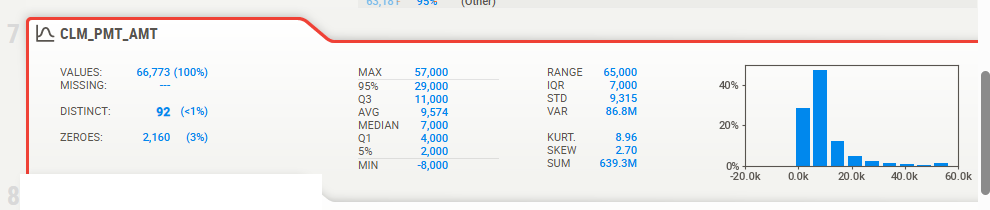

**Observation on Claim Paid Amount**
* There is a moderate Coorelation between Claim Paid Amount and the number of the days spent in the Hospital.
* There is a moderately strong coorelation between the Claim Paid Amount and the ICD9_PRCDR_CD_1. This make sense because procedures are paid more compared to just a physician visits. Also when a procedure is done there is high probability patients might stay in the hospital for more than one day.

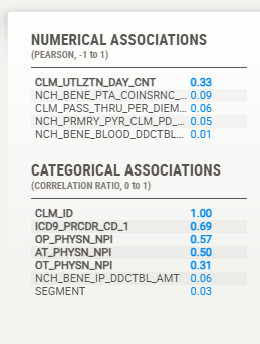

**Observation on CLM_UTLZTN_DAY_CNT**
* There is a moderate Correlation with several categorial features in the dataset. Namely AT_PHYSN_NPI, OP_PHYSN_NPI AND ICD9_PRCDR_CD_1


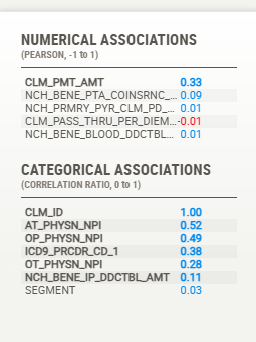


The below functions need to be defined to carry out the EDA.

In [138]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [139]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [140]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [141]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",hue=None
    )

    plt.tight_layout()
    plt.show()

In [142]:
#TOP 10 - BAR PLOT
def top_10_bar_plot(df, column_name,display_name):
       # Count occurrences of each value in the column
    value_counts = df[column_name].value_counts().head(10)

    # Plotting the top 10 occurrences with different colors and a bigger size
    plt.figure(figsize=(14, 6))
    bars = value_counts.plot(kind='bar', color=plt.cm.Paired(range(len(value_counts))))

    # Adding totals on top of each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center', size=12, xytext=(0, 8),
                      textcoords='offset points')

    plt.title(f'Top 10 Occurrences in {display_name}')
    plt.xlabel(display_name)
    plt.ylabel('Frequency')
    plt.show()


In [143]:
def top_10_bar_plot_percent(df, column_name,display_name):
       # Count occurrences of each value in the column
    # Count occurrences of each value in the column
    value_counts = df[column_name].value_counts(normalize=True).head(10) * 100  # Convert to percentage

    # Plotting the top 10 occurrences with different colors and a bigger size
    plt.figure(figsize=(12, 6))
    bars = value_counts.plot(kind='bar', color=plt.cm.Paired(range(len(value_counts))))

    # Adding percentages on top of each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f') + '%',
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center', size=12, xytext=(0, 8),
                      textcoords='offset points')

    plt.title(f'Top 10 Occurrences in {display_name}')
    plt.xlabel(display_name)
    plt.ylabel('Percentage')
    plt.show()

# Univariate Analysis


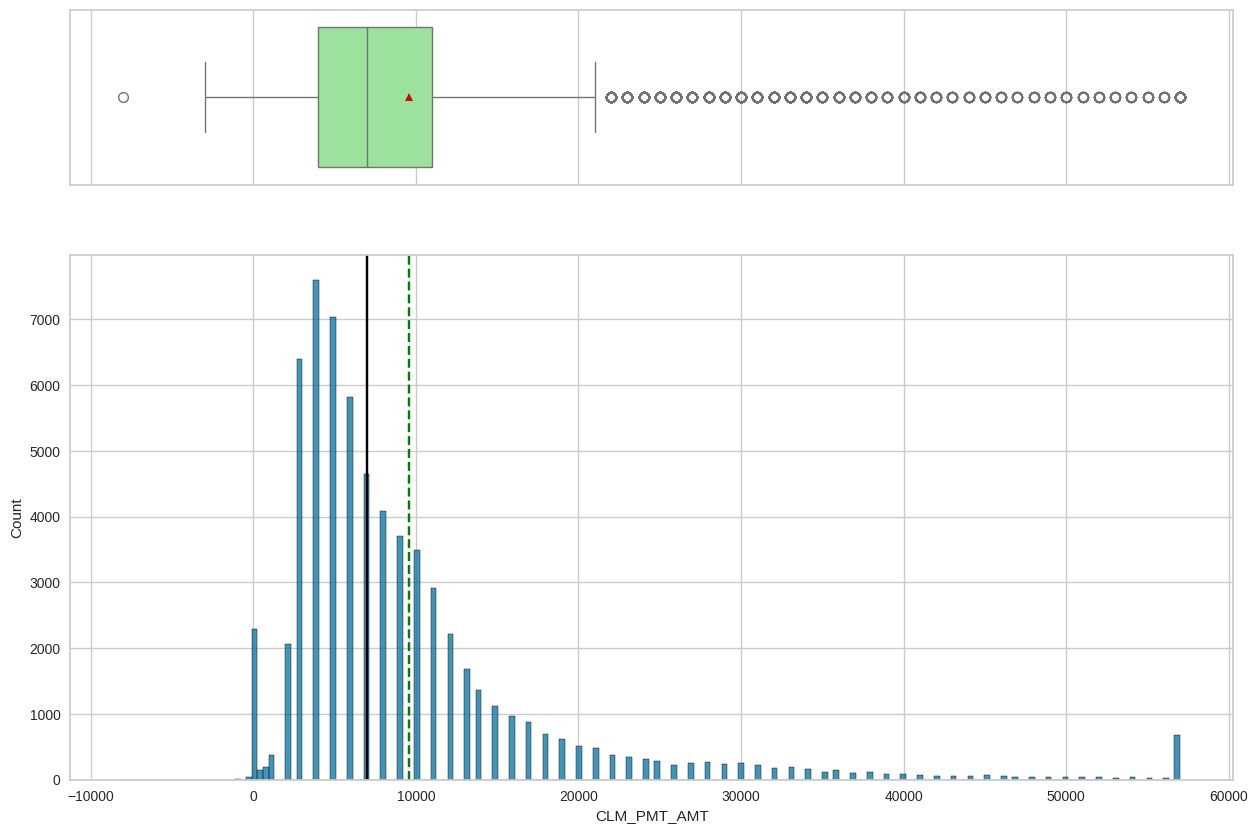

In [144]:
histogram_boxplot(df, "CLM_PMT_AMT")

**Observation**

* The Claim Payment Amount distribution is right skewed with the average payment amount of 9573.
* There are several outliers present.

In [145]:



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['CLM_PMT_AMT'].quantile(0.25)
Q3 = df['CLM_PMT_AMT'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify positive outliers
positive_outliers = df[df['CLM_PMT_AMT'] > upper_bound]

# Find the smallest positive outlier
smallest_positive_outlier = positive_outliers['CLM_PMT_AMT'].min()

print(f'The smallest positive outlier in claim_paid_amount is {smallest_positive_outlier}')



The smallest positive outlier in claim_paid_amount is 22000.0


In [146]:
df_clm_amt_out = df[df['CLM_PMT_AMT'] >= smallest_positive_outlier]

In [147]:
df_clm_amt_out.shape


(5431, 36)

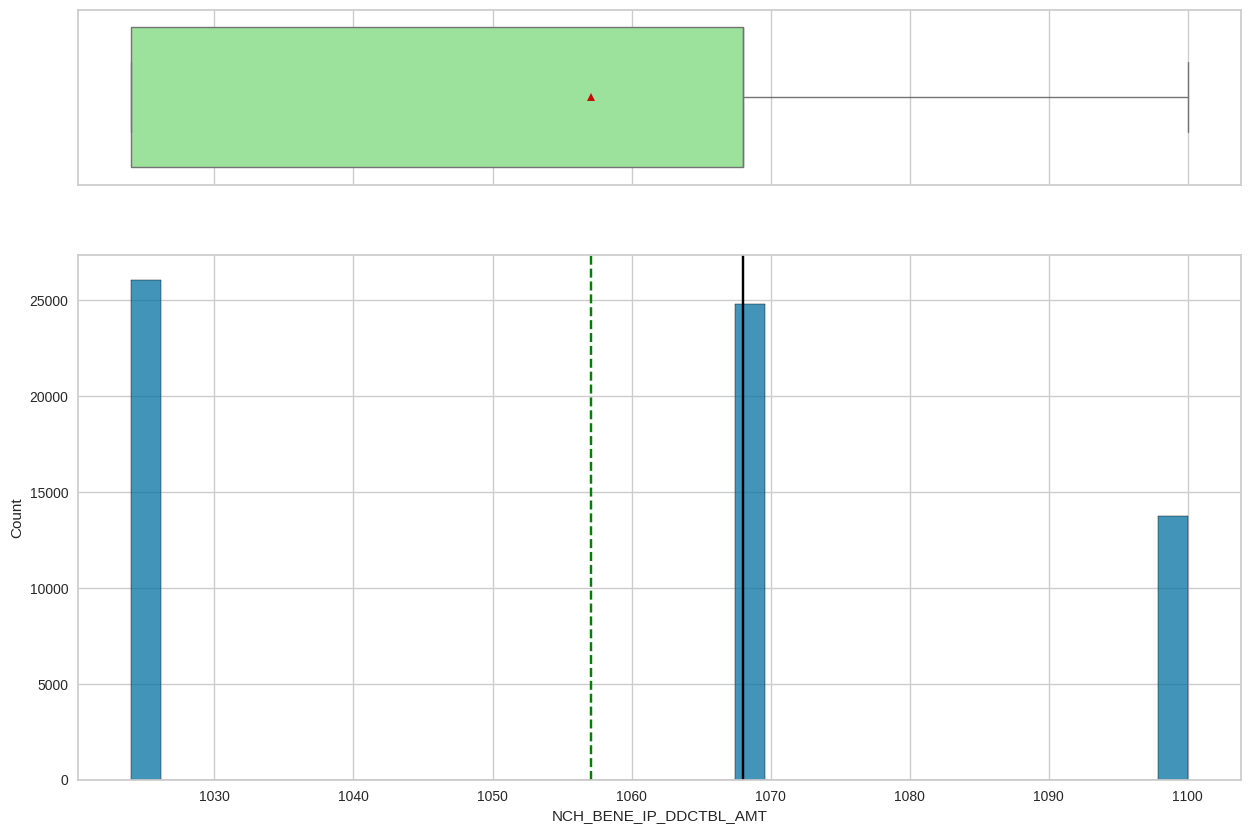

In [148]:
histogram_boxplot(df, "NCH_BENE_IP_DDCTBL_AMT")

Observation:
* The NCH_BENE_IP_DDCTBL_AMT is skewed to the right.



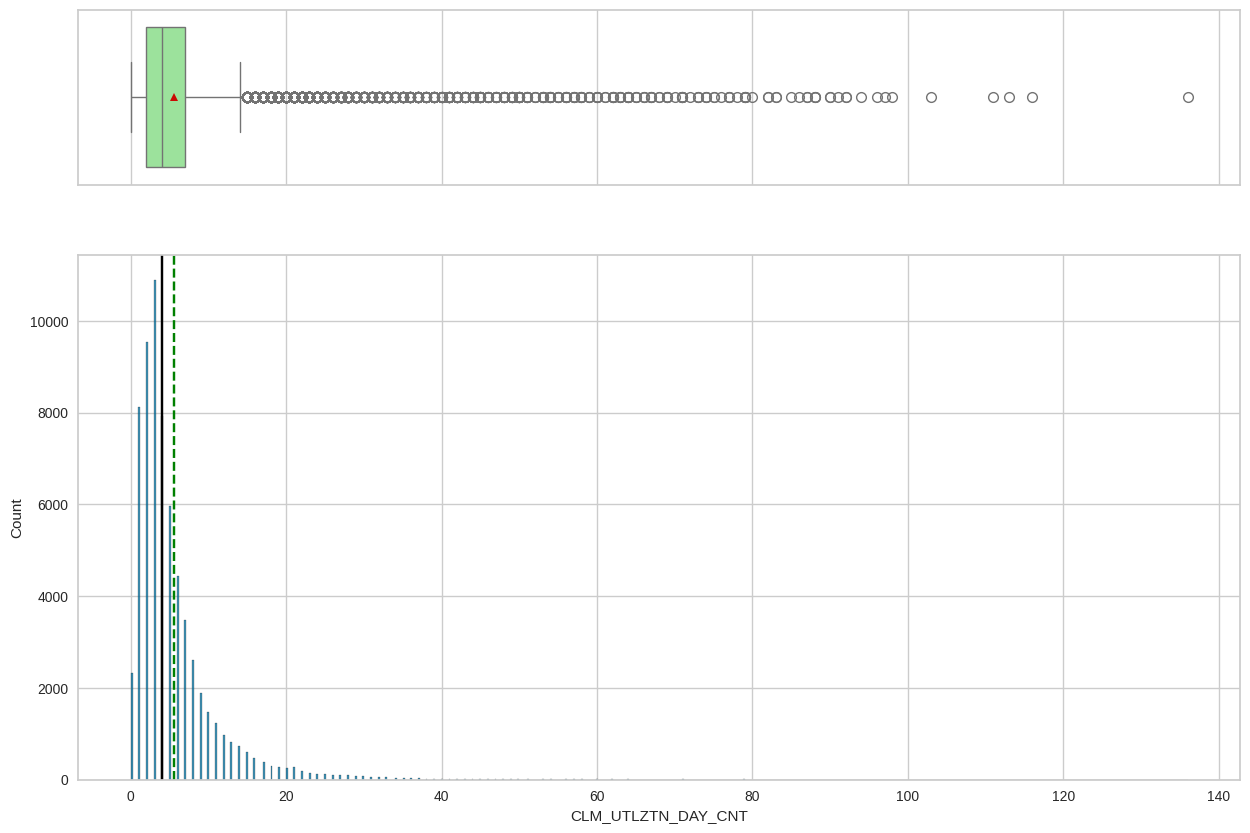

In [149]:
histogram_boxplot(df, "CLM_UTLZTN_DAY_CNT")

**Observation:**
* The Claim Utilization Days is right skewed with many outliers.
* Majority of the patient stay less than 10 days.

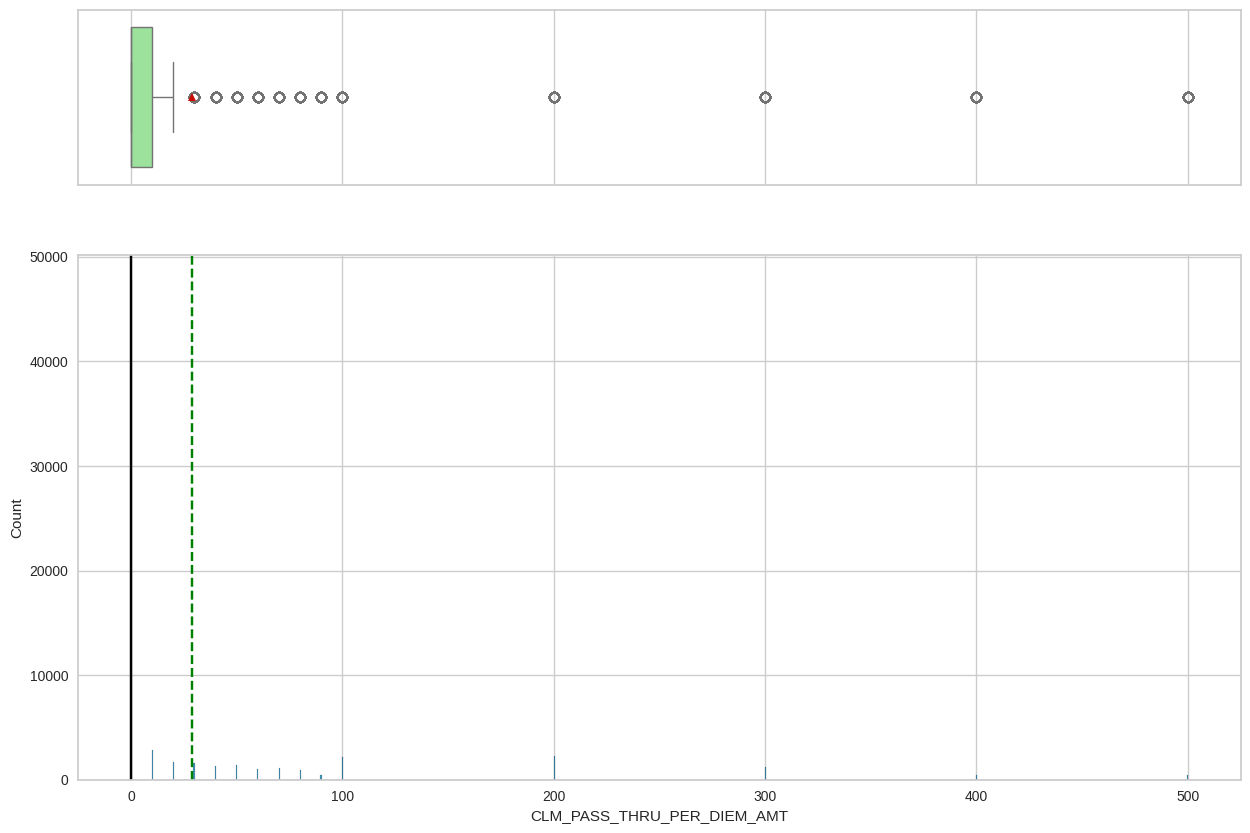

In [150]:
histogram_boxplot(df, "CLM_PASS_THRU_PER_DIEM_AMT")

**Observation**

* CLM_PASS_THRU_PER_DIEM_AMT does not have very many observations. However based on the data we have it is skewed to the right.



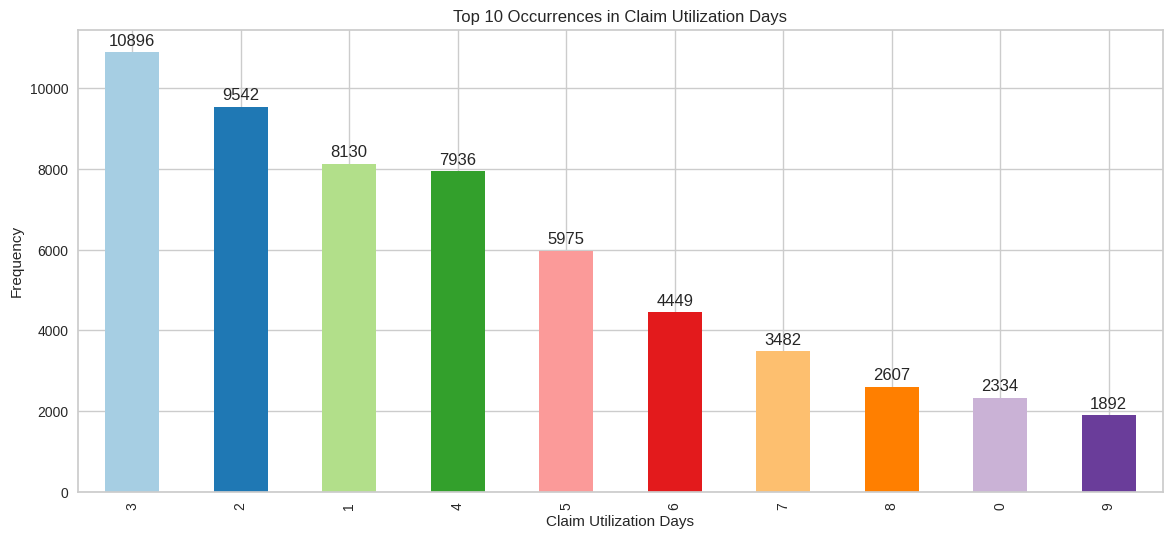

In [151]:
# Bar Plot for Claim Utilization Days
top_10_bar_plot(df,"CLM_UTLZTN_DAY_CNT","Claim Utilization Days")

**Observation**
* Most patients stayed in the hospital for a total of 3 days.
* There are 2334 instances with 0 days. This is could where patients were discarged the same day or we just do not know the information.

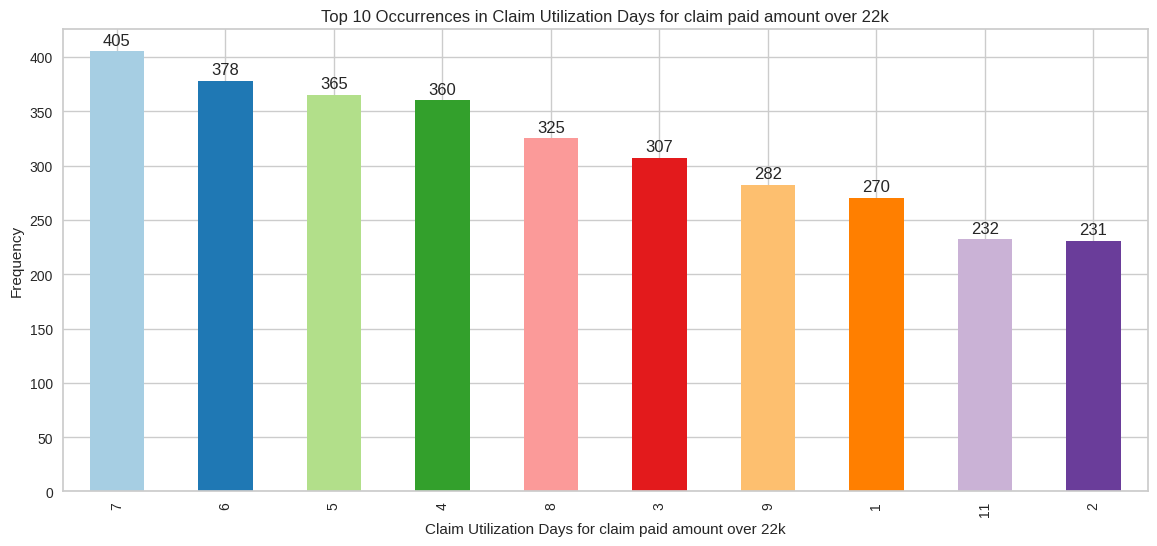

In [152]:
# Bar Plot for Claim Utilization Days for the claims that over 22K
top_10_bar_plot(df_clm_amt_out,"CLM_UTLZTN_DAY_CNT","Claim Utilization Days for claim paid amount over 22k")

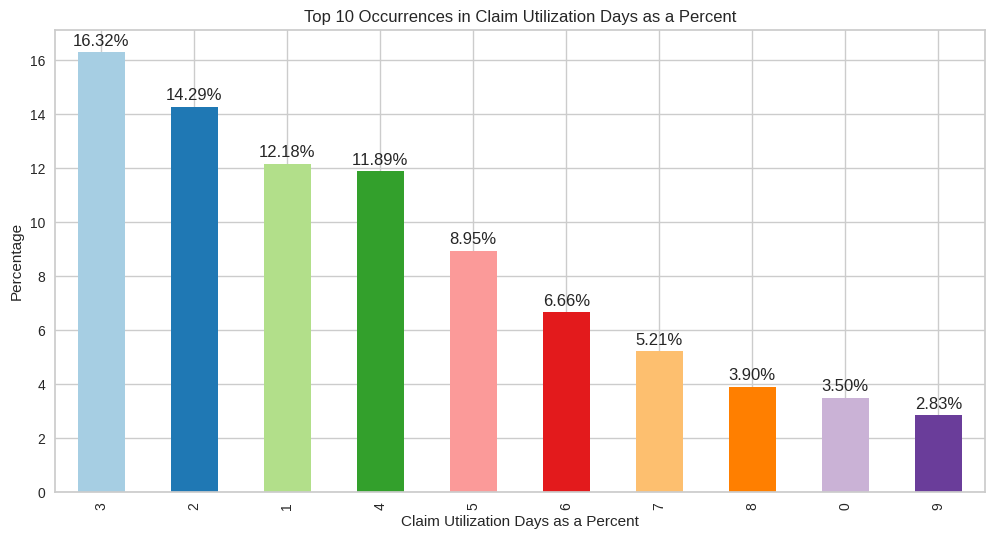

In [153]:
top_10_bar_plot_percent(df,"CLM_UTLZTN_DAY_CNT","Claim Utilization Days as a Percent")

**Observation**
*   16% of the patient admitted stayed for 3 days.
*   14% of the pattient admitted stayed for 2 days followed by 1 Day, 4 Days, etc.



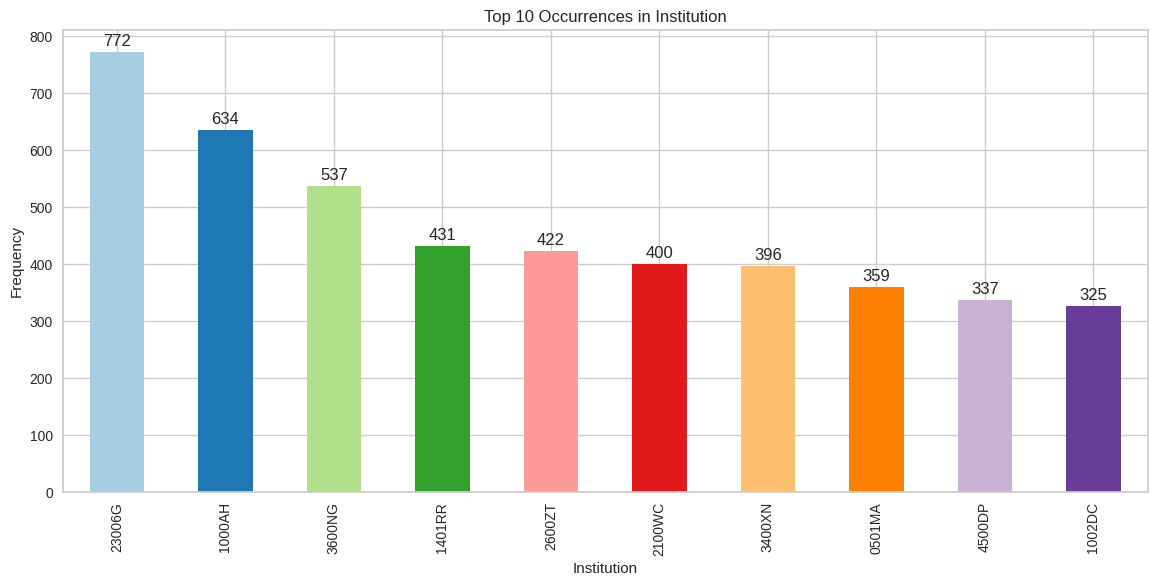

In [154]:
top_10_bar_plot(df,"PRVDR_NUM","Institution")

**Observation**
* The most number of claims submitted in the dataset is 23006G followed by 1000AH


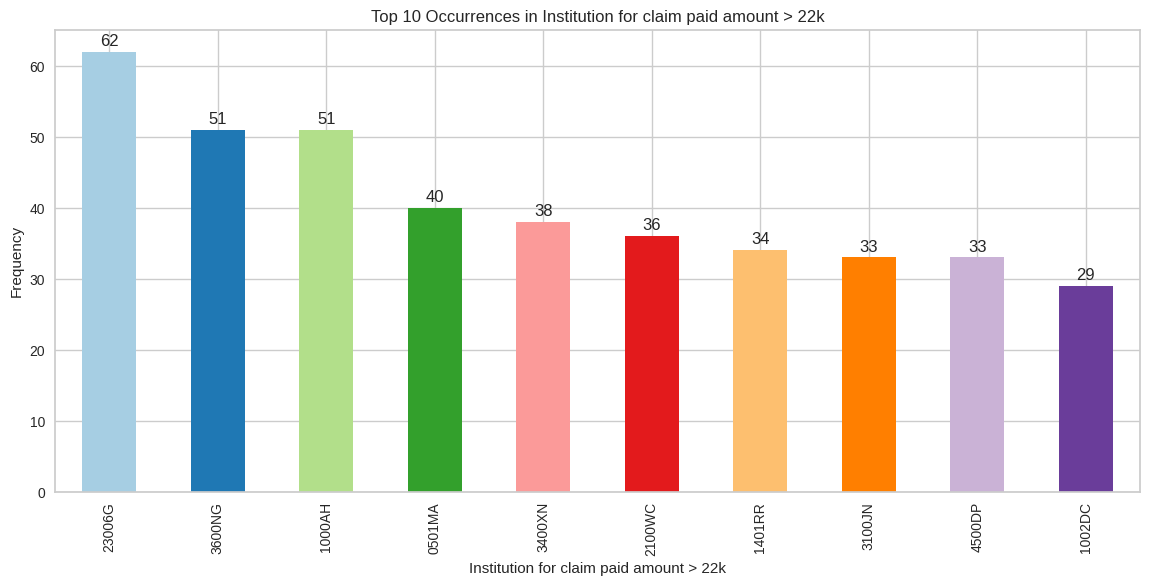

In [155]:

top_10_bar_plot(df_clm_amt_out,"PRVDR_NUM","Institution for claim paid amount > 22k")

**Observation**
* for the claims that were paid over the outlier amount, 23006G was the highest at 62 claims followed by 51.
* There is not a significant amount of difference between the rest of the institutions.

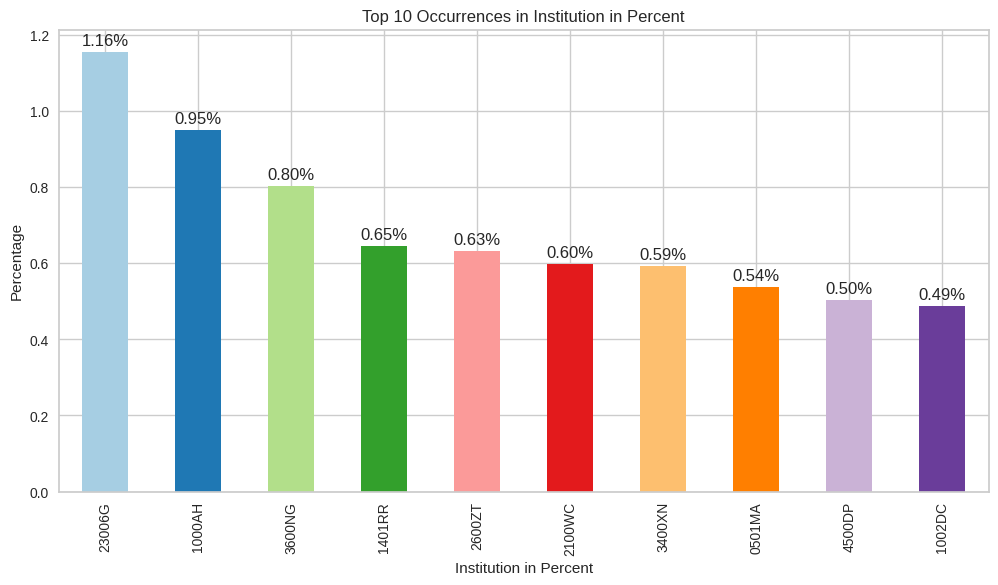

In [156]:
top_10_bar_plot_percent(df,"PRVDR_NUM","Institution in Percent")

**Observation**
* Based on the this chart we understand no one or one group institution is submitting a lot of claims.
* They are distributed among various institutions.

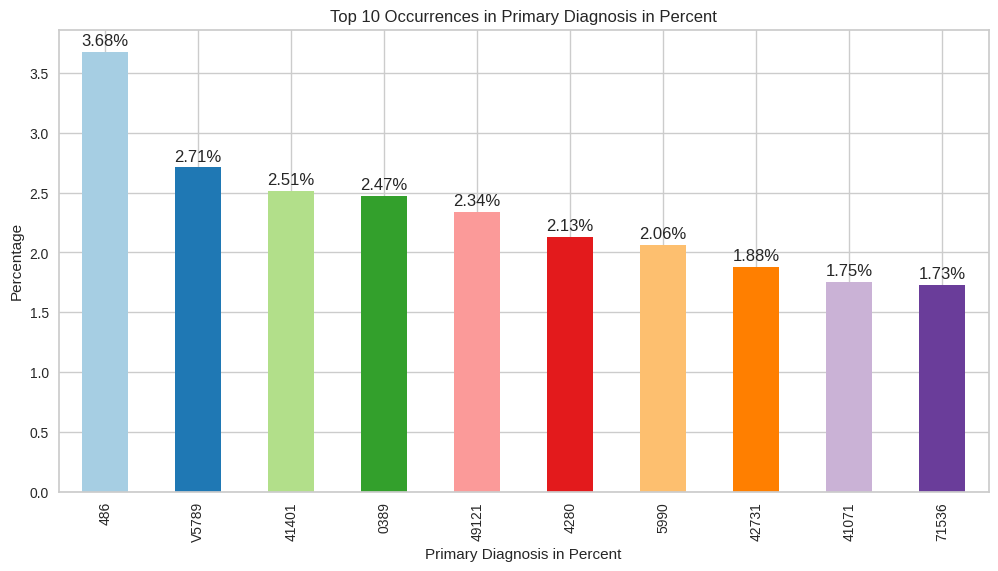

In [157]:
top_10_bar_plot_percent(df,"ICD9_DGNS_CD_1","Primary Diagnosis in Percent")

**Observation**

* Most Primary Diagnosis in this data set is *Pneumonia, organism unspecified*

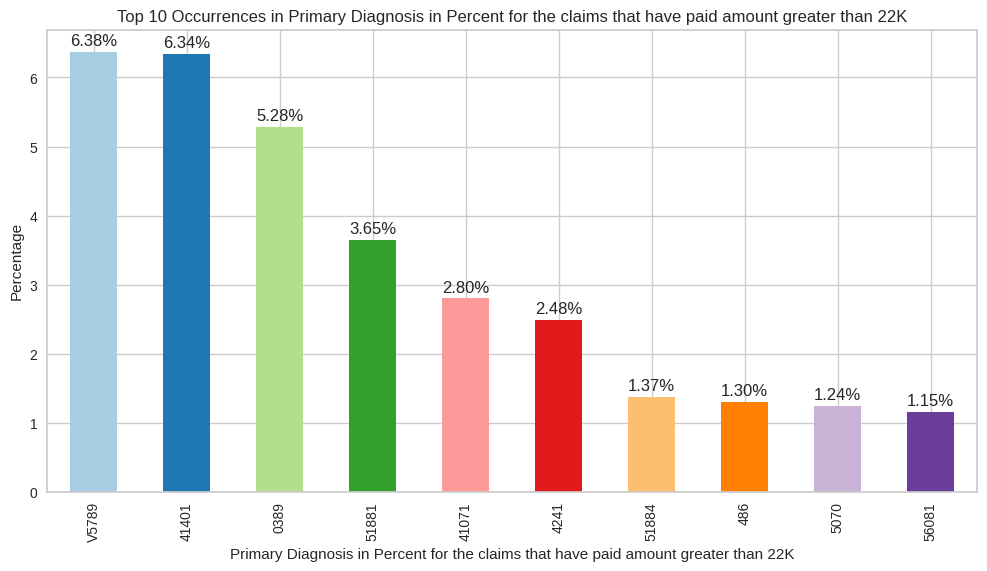

In [158]:
# top 10 diagnosis for the claim amount that are greater than 22k
top_10_bar_plot_percent(df_clm_amt_out,"ICD9_DGNS_CD_1","Primary Diagnosis in Percent for the claims that have paid amount greater than 22K")

**Observation**

* Most Primary Diagnosis in this data set is *Pneumonia, organism unspecified*
* Closely followed by *coronary atherosclerosis of the native coronary artery*

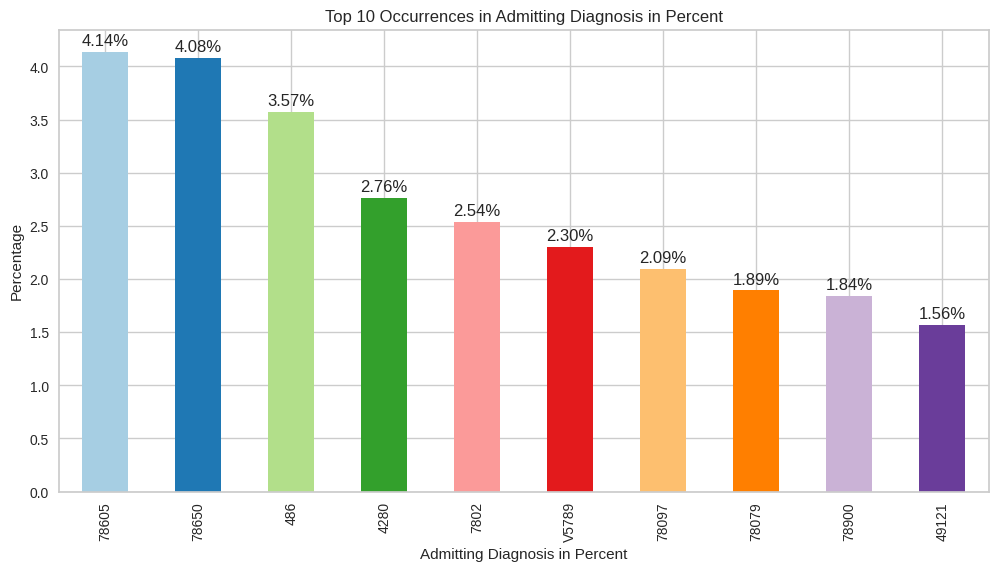

In [159]:
top_10_bar_plot_percent(df,"ADMTNG_ICD9_DGNS_CD","Admitting Diagnosis in Percent")

**Observation**

Most Primary Diagnosis in this data set is *Shortness of Breath*




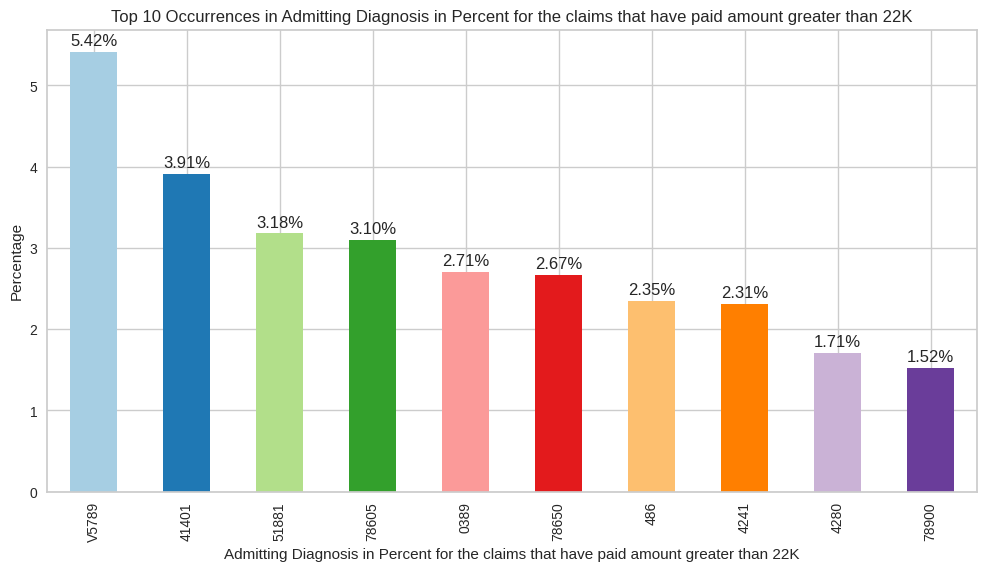

In [160]:
# top 10 diagnosis for the claim amount that are greater than 22k
top_10_bar_plot_percent(df_clm_amt_out,"ADMTNG_ICD9_DGNS_CD","Admitting Diagnosis in Percent for the claims that have paid amount greater than 22K")

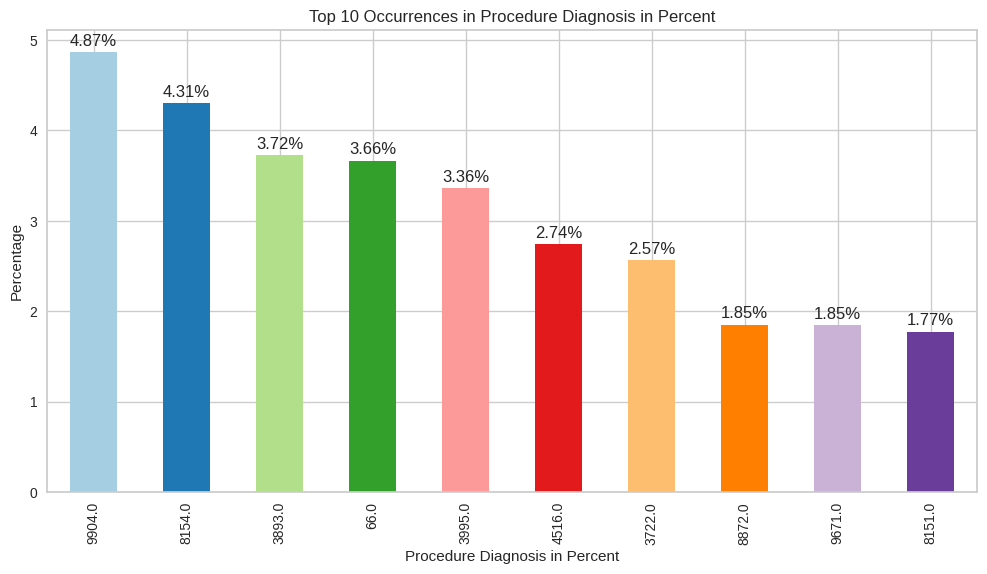

In [161]:
top_10_bar_plot_percent(df,"ICD9_PRCDR_CD_1","Procedure Diagnosis in Percent")

**Observation**

* Most Procedure Diagnosis in this data set is *Packed Cell Transfusion*
* Followed by Knee Replacement


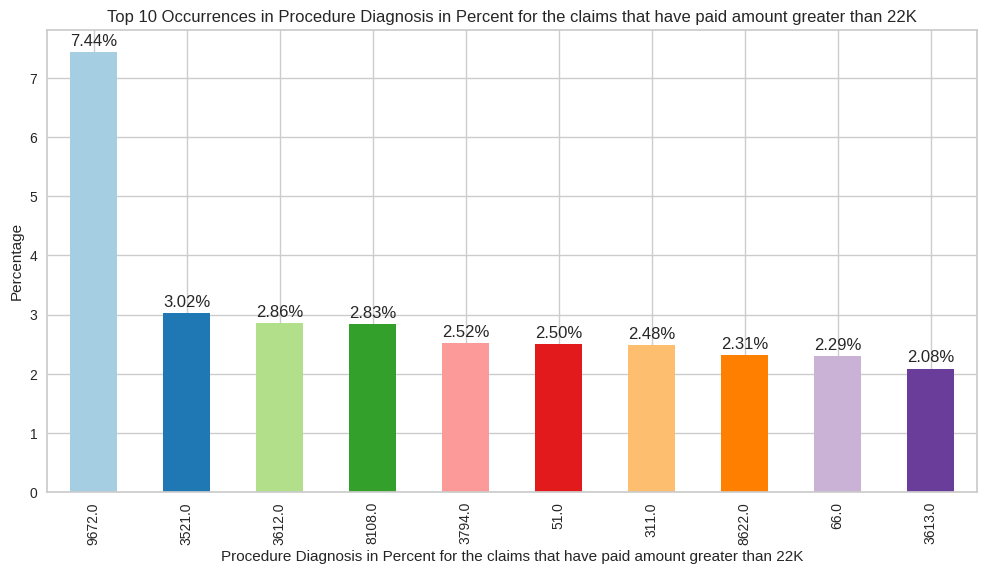

In [162]:
# top 10 diagnosis for the claim amount that are greater than 22k
top_10_bar_plot_percent(df_clm_amt_out,"ICD9_PRCDR_CD_1","Procedure Diagnosis in Percent for the claims that have paid amount greater than 22K")

**Observation**
The ICD-9 diagnosis code 9672 is for continuous mechanical ventilation for 96 consecutive hours or more is more than double to the next code in this dataset.

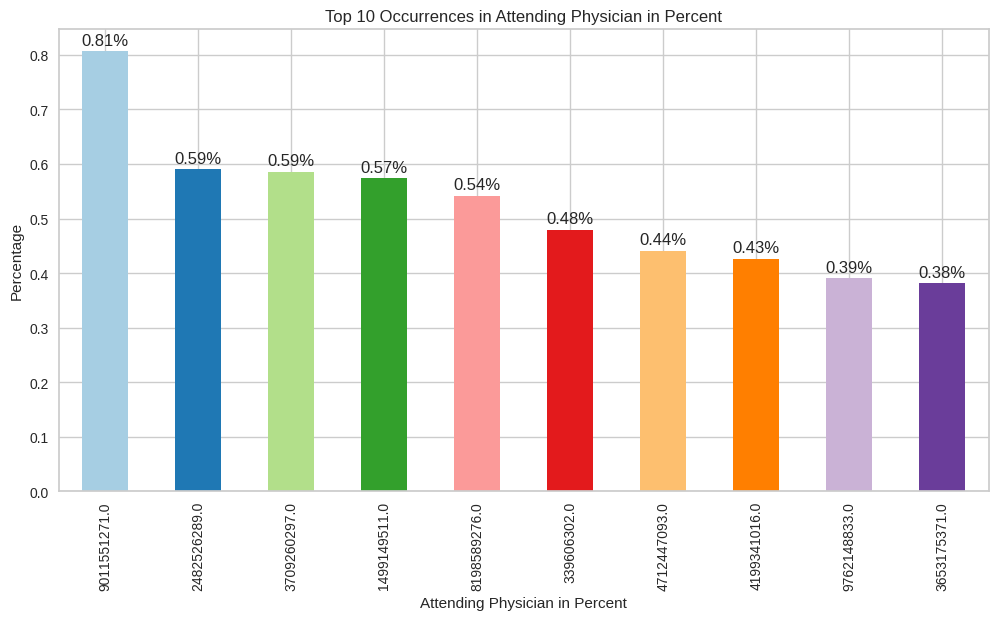

In [163]:
top_10_bar_plot_percent(df,"AT_PHYSN_NPI","Attending Physician in Percent")


**Observation**
The Claims are sparsely distributed among various physicians.

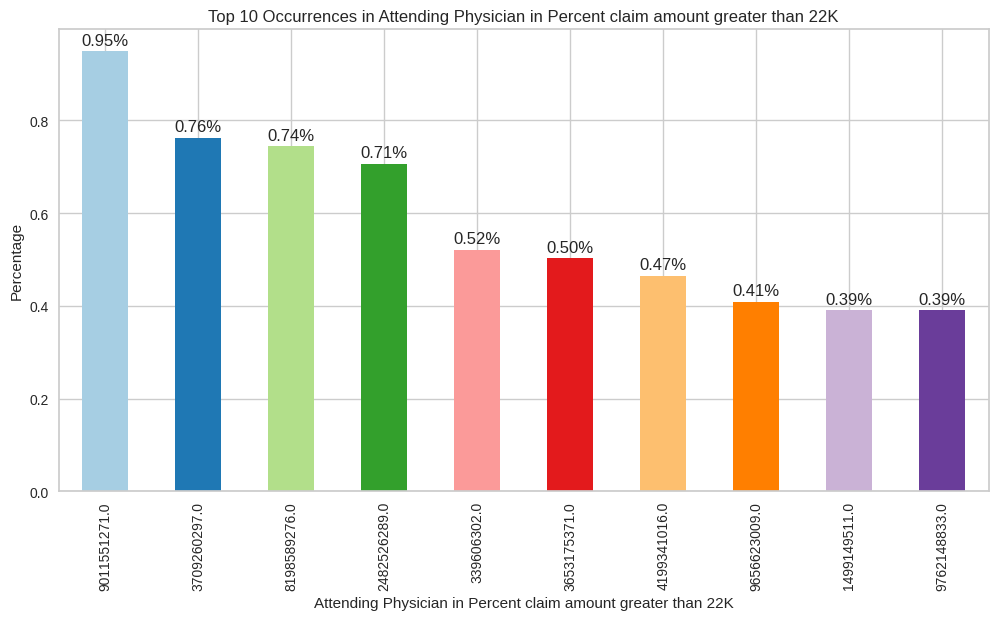

In [164]:
top_10_bar_plot_percent(df_clm_amt_out,"AT_PHYSN_NPI","Attending Physician in Percent claim amount greater than 22K")

**Correlation**

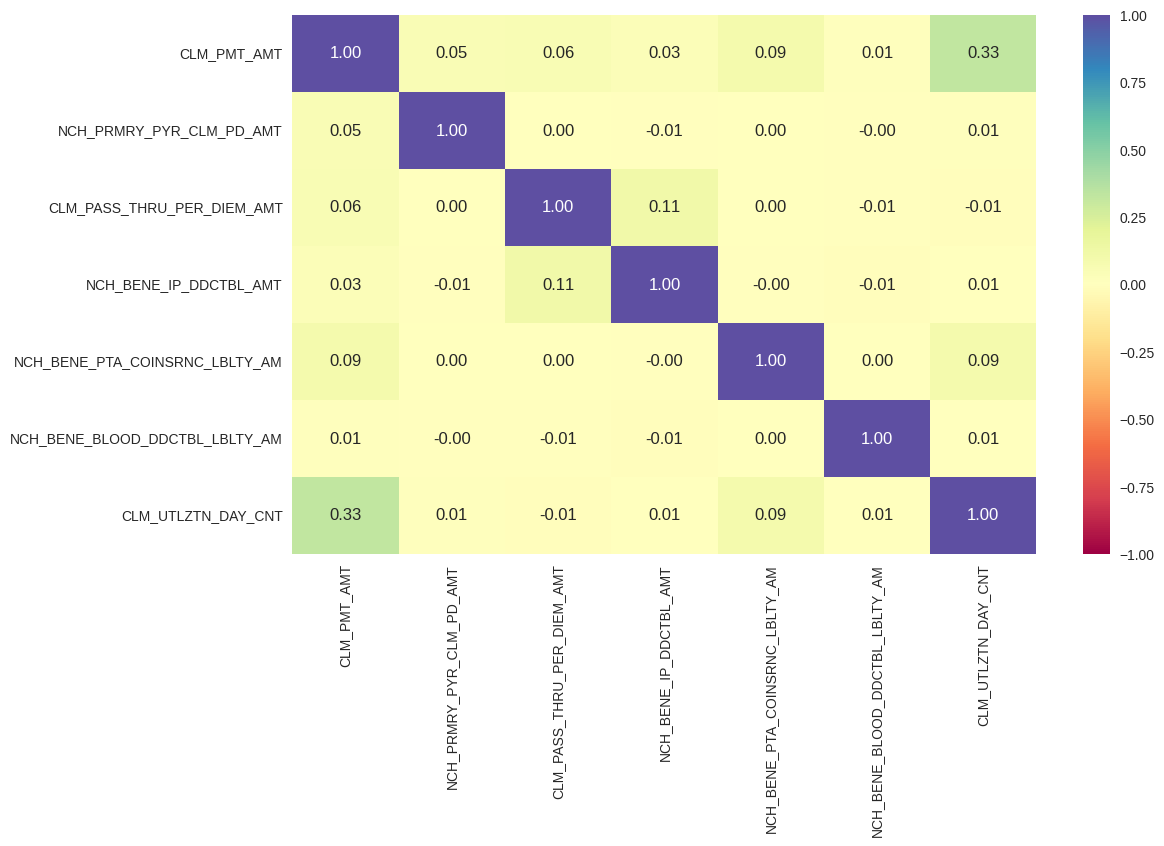

In [165]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


**Observation**
* There is some correlation between CLM_PMT_AMT and CLM_UTLZTN_DAY_CNT. This makes sense and the payment amount is directly depended on the amount of the days the patient stays in the hospital.
* There is a strong correlation between the processting time and the time of stay in the hospital.


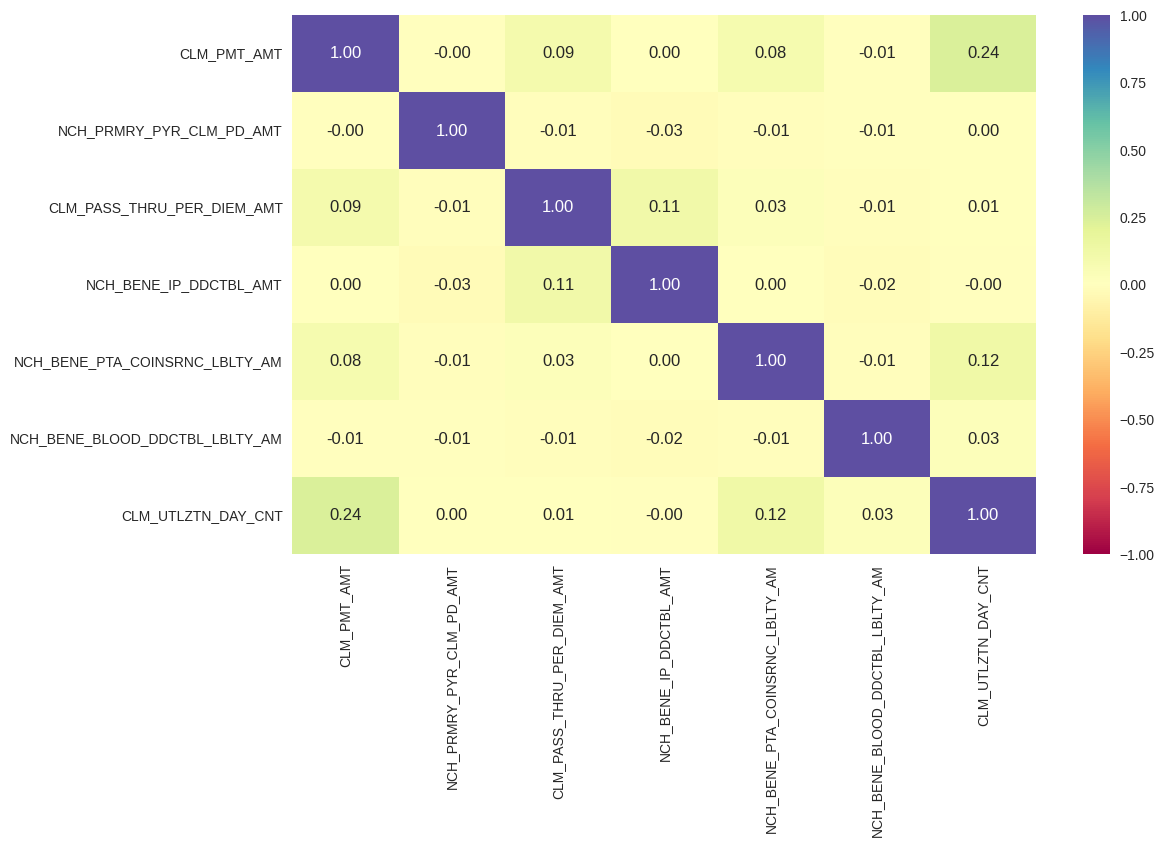

In [166]:
# Correlation for the dataset which has claim paid amount greater than 22K
cols_list = df_clm_amt_out.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_clm_amt_out[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation**

* There is no significant difference between this dataset and the df dataset on correlation.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DESYNPUF_ID                     66773 non-null  object  
 1   CLM_ID                          66773 non-null  category
 2   SEGMENT                         66773 non-null  category
 3   CLM_FROM_DT                     66705 non-null  object  
 4   CLM_THRU_DT                     66705 non-null  object  
 5   PRVDR_NUM                       66773 non-null  object  
 6   CLM_PMT_AMT                     66773 non-null  float64 
 7   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64 
 8   AT_PHYSN_NPI                    66100 non-null  category
 9   OP_PHYSN_NPI                    39058 non-null  category
 10  OT_PHYSN_NPI                    7683 non-null   category
 11  CLM_ADMSN_DT                    66773 non-null  object  
 12  ADMTNG_ICD9_DGNS_C

In [168]:
# Select the two columns
# df_subset = df[['CLM_PROC_TIME', 'CLM_UTLZTN_DAY_CNT']]

# List the top 10 rows
# top_10_rows = df_subset.head(10)

# print(top_10_rows)

# Trend Analysis

In [169]:
# Extract month and year from the admission date
# Convert 'CLM_ADMSN_DT' to datetime if it's not already
admission_date = pd.to_datetime(df_clm_amt_out['CLM_ADMSN_DT'])
df_clm_amt_out['Month_Year'] = admission_date.dt.to_period('M')

# Count admissions per month
#admissions_per_month = df_clm_amt_out['Month_Year'].value_counts().sort_index()

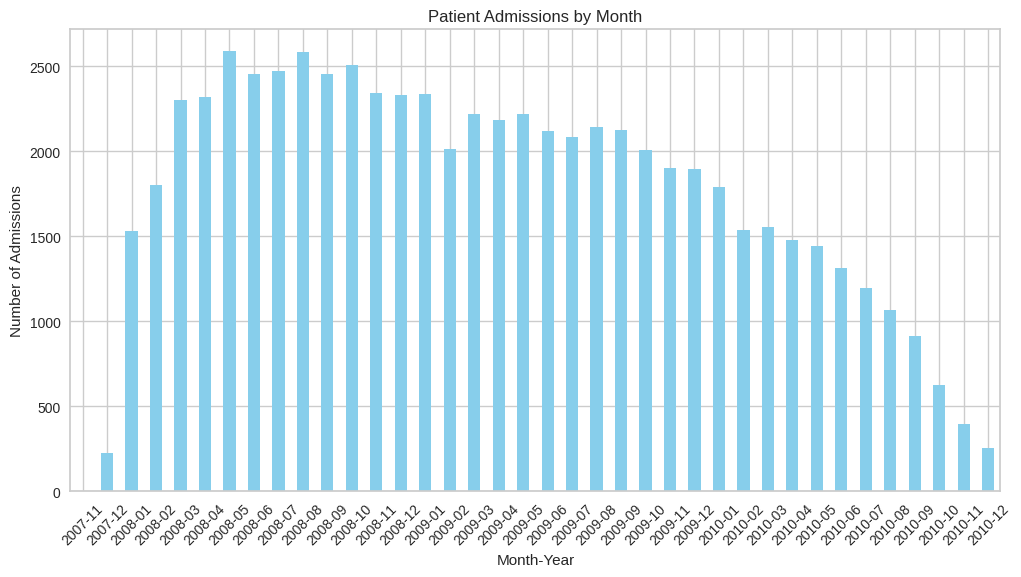

In [170]:
# Extract month and year from the admission date
# Convert 'CLM_ADMSN_DT' to datetime if it's not already
admission_date = pd.to_datetime(df['CLM_ADMSN_DT'])
df['Month_Year'] = admission_date.dt.to_period('M')

# Count admissions per month
admissions_per_month = df['Month_Year'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
admissions_per_month.plot(kind='bar', color='skyblue')
plt.title('Patient Admissions by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()


**Observations**

* The above chart shows the number of admissions each month.
* The data is spread across from Nov-2007 to Dec-2010
* In 2010 the admissions seems to trending down

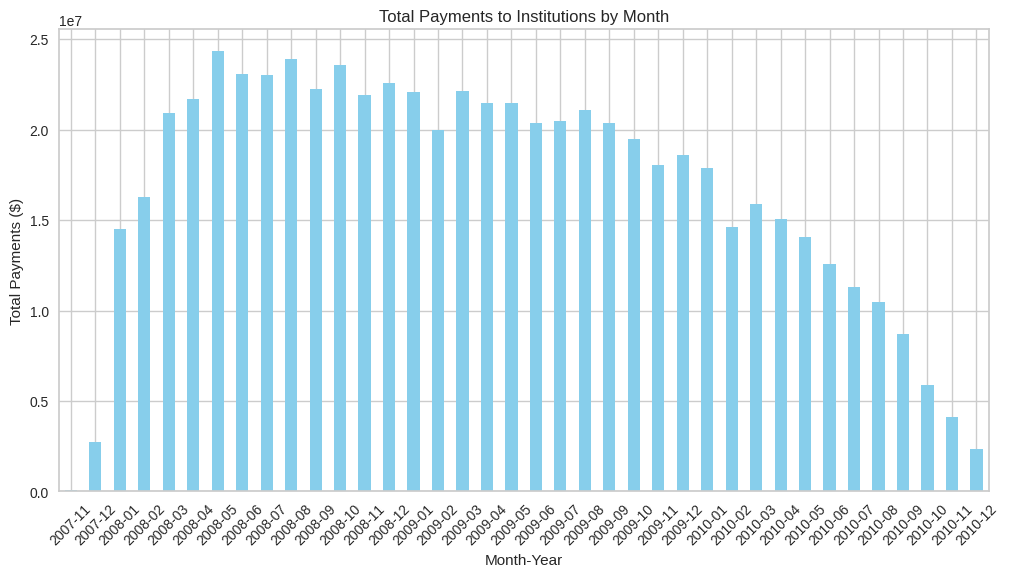

In [171]:
# Group by month and sum the payments
monthly_payments = df.groupby('Month_Year')['CLM_PMT_AMT'].sum()

# Plotting the trend chart
plt.figure(figsize=(12, 6))
monthly_payments.plot(kind='bar', color='skyblue')
plt.title('Total Payments to Institutions by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Payments ($)')
plt.xticks(rotation=45)
plt.show()

**Observations**
* The above charts represents the total payments to the healthcare institutions each month from Nov 2007 to Dec 2010
* The payments seems to be trending down from Jan 2010 to Dec 2010

# BiVariant Analysis

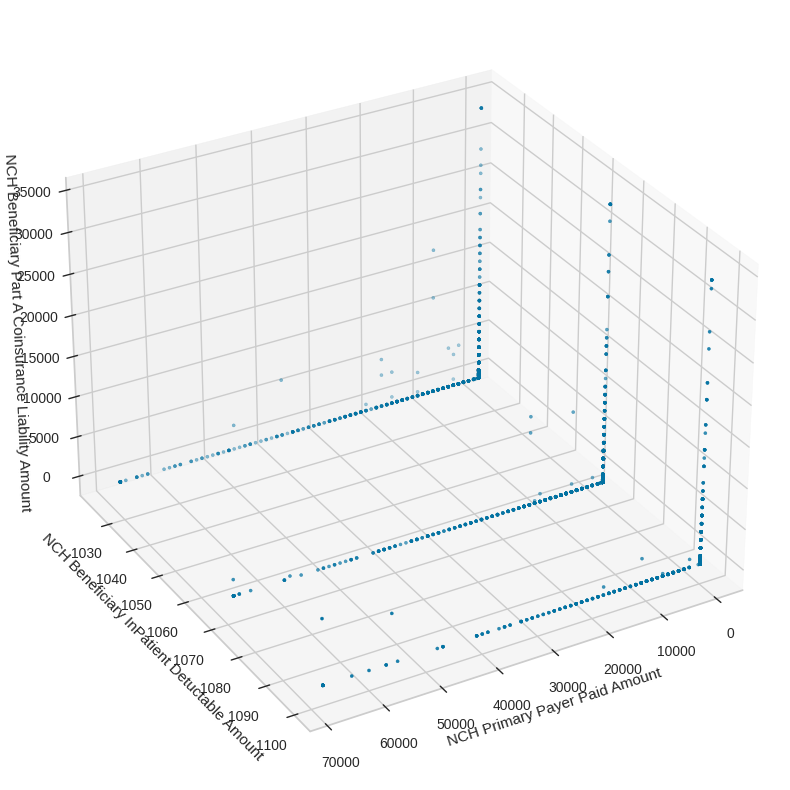

In [172]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["NCH_PRMRY_PYR_CLM_PD_AMT"]
y = df["NCH_BENE_IP_DDCTBL_AMT"]
z = df["NCH_BENE_PTA_COINSRNC_LBLTY_AM"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("NCH Primary Payer Paid Amount")
ax.set_ylabel("NCH Beneficiary InPatient Detuctable Amount")
ax.set_zlabel("NCH Beneficiary Part A Coinsurance Liability Amount")
ax.view_init(azim=60)
plt.show()

**Observation**

NCH Primary Payer Paid Amount Vs
NCH Beneficiary InPatient Detuctable Amount Vs
NCH Beneficiary Part A Coinsurance Liability Amount

# Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [173]:
# Making a copy of the dataset to preserve the original data set before processing it.
# We will process the data1 dataset.
data2 = df.copy()

data1 = df.copy()
#data1 = df_clm_amt_out.copy()

In [174]:
# EDA on Cleaned and Pre-Processed Data
# Using Dtale libraries to produce the EDA
# Installing Dtale libraries
#!pip install dtale --upgrade

In [175]:
#Importing these libraries
#import dtale
#import dtale.app as dtale_app
#dtale_app.USE_COLAB = True

In [176]:
#dtale.show(df)
#dtale.show(data2, ignore_duplicate=True)
# use the link below and analyze the data as necessary

**Drop Unnecessary Columsn from the dataset.**

In [177]:
data1 = data1.drop(["DESYNPUF_ID"], axis=1)
data1 = data1.drop(["CLM_ID"], axis=1)
data1 = data1.drop(["CLM_THRU_DT"], axis=1)
data1 = data1.drop(["CLM_FROM_DT"], axis=1)
data1 = data1.drop(["CLM_ADMSN_DT"], axis=1)
data1 = data1.drop(["NCH_BENE_DSCHRG_DT"], axis=1)


**Converting categorical features to string.**

---


**This will help us processing the data**

In [178]:
data1['AT_PHYSN_NPI'] = data1['AT_PHYSN_NPI'].astype('str')
data1['AT_PHYSN_NPI'] = data1['AT_PHYSN_NPI'].astype('str')
data1['OP_PHYSN_NPI'] = data1['OP_PHYSN_NPI'].astype('str')
data1['OT_PHYSN_NPI'] = data1['OT_PHYSN_NPI'].astype('str')
data1['ICD9_PRCDR_CD_1'] = data1['ICD9_PRCDR_CD_1'].astype('str')
data1['Month_Year'] = data1['Month_Year'].astype('str')

**MISSING Value Treatment**

In [179]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   SEGMENT                         66773 non-null  category
 1   PRVDR_NUM                       66773 non-null  object  
 2   CLM_PMT_AMT                     66773 non-null  float64 
 3   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64 
 4   AT_PHYSN_NPI                    66773 non-null  object  
 5   OP_PHYSN_NPI                    66773 non-null  object  
 6   OT_PHYSN_NPI                    66773 non-null  object  
 7   ADMTNG_ICD9_DGNS_CD             66174 non-null  object  
 8   CLM_PASS_THRU_PER_DIEM_AMT      66773 non-null  float64 
 9   NCH_BENE_IP_DDCTBL_AMT          64595 non-null  float64 
 10  NCH_BENE_PTA_COINSRNC_LBLTY_AM  66773 non-null  float64 
 11  NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  66773 non-null  float64 
 12  CLM_UTLZTN_DAY_CNT

In [180]:
# Concatenate specified columns into a new column 'ICD9CODES'
#data1['ICD9CODES'] = data1[['ADMTNG_ICD9_DGNS_CD','ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3',
#                      'ICD9_DGNS_CD_4', 'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6',
#                      'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8', 'ICD9_DGNS_CD_9',
#                      'ICD9_DGNS_CD_10']].apply(lambda row: '++'.join(row.values.astype(str)), axis=1)

# Concatenate specified columns into a new column 'ICD9CODES'
data1['ICD9CODES'] = data1[['ADMTNG_ICD9_DGNS_CD','ICD9_DGNS_CD_1']].apply(lambda row: '++'.join(row.values.astype(str)), axis=1)

In [181]:
# Concatenate specified columns into a new column 'ICD9PRCDRCODES'
#data1['ICD9PRCDRCODES'] = data1[['ICD9_PRCDR_CD_1', 'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3',
#                           'ICD9_PRCDR_CD_4', 'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6']].apply(lambda row: '++'.join(row.values.astype(str)), axis=1)
data1['ICD9PRCDRCODES'] = data1[['ICD9_PRCDR_CD_1', 'ICD9_PRCDR_CD_2']].apply(lambda row: '++'.join(row.values.astype(str)), axis=1)

In [182]:
# Drop the original columns
data1 = data1.drop(columns=['ICD9_PRCDR_CD_1', 'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3',
                      'ICD9_PRCDR_CD_4', 'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6'])

In [183]:
# Drop the specified columns
data1 = data1.drop(columns=['ADMTNG_ICD9_DGNS_CD','ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3',
                      'ICD9_DGNS_CD_4', 'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6',
                      'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8', 'ICD9_DGNS_CD_9',
                      'ICD9_DGNS_CD_10'])


In [184]:
# Convert specified columns to categorical data type
columns_to_convert = ['SEGMENT', 'PRVDR_NUM', 'CLM_DRG_CD',
                      'ICD9CODES', 'ICD9PRCDRCODES']

data1[columns_to_convert] = data1[columns_to_convert].astype('category')


In [185]:
# Concatenate specified columns into a new column 'PROVIDER'
data1['PROVIDER'] = data1[['AT_PHYSN_NPI',
                           'OP_PHYSN_NPI',
                           'OT_PHYSN_NPI']].apply(lambda row: '++'.join(row.values.astype(str)), axis=1)

In [186]:
# Drop the specified columns
data1 = data1.drop(columns=['AT_PHYSN_NPI', 'OP_PHYSN_NPI',
                      'OT_PHYSN_NPI'])

In [187]:
# REPLACING NULL VALUES WITH ZERO, ASSUMING NO PAYMENT WAS MADE.
#data1['NCH_BENE_IP_DDCTBL_AMT'] = data1['NCH_BENE_IP_DDCTBL_AMT'].replace(0, 'NaN')
# Replace NaN values with zero
data1['NCH_BENE_IP_DDCTBL_AMT'] = data1['NCH_BENE_IP_DDCTBL_AMT'].apply(lambda x: 0 if pd.isnull(x) else x)

In [188]:
# Find missing values in this Claim Data set Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = data1.isnull().sum()
print(missing)

SEGMENT                           0
PRVDR_NUM                         0
CLM_PMT_AMT                       0
NCH_PRMRY_PYR_CLM_PD_AMT          0
CLM_PASS_THRU_PER_DIEM_AMT        0
NCH_BENE_IP_DDCTBL_AMT            0
NCH_BENE_PTA_COINSRNC_LBLTY_AM    0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM    0
CLM_UTLZTN_DAY_CNT                0
CLM_DRG_CD                        0
Month_Year                        0
ICD9CODES                         0
ICD9PRCDRCODES                    0
PROVIDER                          0
dtype: int64


In [189]:
data1.head(10)

,SEGMENT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,CLM_DRG_CD,Month_Year,ICD9CODES,ICD9PRCDRCODES,PROVIDER
0,1,2600GD,4000.0,0.0,0.0,1100.0,0.0,0.0,1,217,2010-03,4580++7802,nan++nan,3139083564.0++nan++nan
1,1,3900MB,26000.0,0.0,0.0,1068.0,0.0,0.0,6,201,2009-04,7866++1970,nan++nan,6476809087.0++nan++nan
2,1,3900HM,5000.0,0.0,0.0,1068.0,0.0,0.0,2,750,2009-08,6186++6186,7092.0++6186,611998537.0++611998537.0++nan
3,1,3913XU,5000.0,0.0,0.0,1068.0,0.0,0.0,3,883,2009-09,29590++29623,nan++nan,4971602784.0++nan++1119000316.0
4,1,3900MB,16000.0,0.0,0.0,1100.0,0.0,0.0,5,983,2010-06,5849++3569,nan++E8889,6408400473.0++1960859579.0++nan
5,1,1401HG,14000.0,0.0,0.0,1024.0,0.0,0.0,1,201,2008-09,78079++486,nan++nan,6132010904.0++nan++nan
6,1,3400WD,5000.0,0.0,0.0,1024.0,0.0,0.0,3,951,2008-09,78097++33811,8659.0++nan,8956735757.0++6551008003.0++nan
7,1,34S0KQ,5000.0,0.0,0.0,1100.0,0.0,0.0,4,205,2010-06,49392++49121,nan++nan,5838958809.0++nan++nan
8,1,3400WD,14000.0,0.0,0.0,0.0,0.0,0.0,21,950,2010-05,V5789++V5789,nan++nan,1907446990.0++nan++nan
9,1,3401ZP,29000.0,0.0,0.0,1100.0,0.0,0.0,3,456,2010-06,99641++7366,73.0++311,4959466403.0++8002609409.0++nan


In [190]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   SEGMENT                         66773 non-null  category
 1   PRVDR_NUM                       66773 non-null  category
 2   CLM_PMT_AMT                     66773 non-null  float64 
 3   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64 
 4   CLM_PASS_THRU_PER_DIEM_AMT      66773 non-null  float64 
 5   NCH_BENE_IP_DDCTBL_AMT          66773 non-null  float64 
 6   NCH_BENE_PTA_COINSRNC_LBLTY_AM  66773 non-null  float64 
 7   NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  66773 non-null  float64 
 8   CLM_UTLZTN_DAY_CNT              66773 non-null  int64   
 9   CLM_DRG_CD                      66773 non-null  category
 10  Month_Year                      66773 non-null  object  
 11  ICD9CODES                       66773 non-null  category
 12  ICD9PRCDRCODES    

In [191]:
data_p = data1.sample(frac=0.9, random_state=123)
data_unseen = data1.drop(data_p.index)

data_p.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data_p.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (60096, 14)
Unseen Data For Predictions: (6677, 14)


In [192]:
data_p.columns

Index(['SEGMENT', 'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'CLM_DRG_CD', 'Month_Year', 'ICD9CODES',
       'ICD9PRCDRCODES', 'PROVIDER'],
      dtype='object')

In [193]:
categoricals = ['SEGMENT', 'PRVDR_NUM','CLM_DRG_CD', 'Month_Year', 'ICD9CODES', 'ICD9PRCDRCODES', 'PROVIDER']
numericals   = ['NCH_PRMRY_PYR_CLM_PD_AMT','CLM_PMT_AMT',
                'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM']


## Setting up Environment in PyCaret

**setup()**:

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [194]:
from pycaret.regression import *

The latest version of PyCaret is Object oriented API. This means that the settings are linked with an object, you can run as many experiments as you want in the same notebook and compare them seamlessly not just across different modeling options but also different preprocessing settings.

In [195]:
# experiment 1 = not using any preprocessing of pycaret.
exp1 = RegressionExperiment()
exp1.setup(data_p, target='CLM_UTLZTN_DAY_CNT', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)

,Description,Value
0,Session id,555
1,Target,CLM_UTLZTN_DAY_CNT
2,Target type,Regression
3,Original data shape,"(60096, 14)"
4,Transformed data shape,"(60096, 14)"
5,Transformed train set shape,"(42067, 14)"
6,Transformed test set shape,"(18029, 14)"
7,Numeric features,6
8,Categorical features,7


In [196]:
# experiment 2, with preprocessing and more!!!
exp2 = RegressionExperiment()
exp2.setup(data_p,target='CLM_UTLZTN_DAY_CNT', session_id=555, train_size=0.7, categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode' ,
           preprocess=True, normalize=True , remove_outliers=True, ordinal_features=None)

,Description,Value
0,Session id,555
1,Target,CLM_UTLZTN_DAY_CNT
2,Target type,Regression
3,Original data shape,"(60096, 14)"
4,Transformed data shape,"(57992, 14)"
5,Transformed train set shape,"(39963, 14)"
6,Transformed test set shape,"(18029, 14)"
7,Numeric features,6
8,Categorical features,7
9,Preprocess,True


## Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [197]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3720,33.1659,5.7578,0.1706,0.6863,0.9285,8.0240
dummy,Dummy Regressor,3.8458,39.9895,6.3228,-0.0001,0.7663,1.1780,0.0420


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [198]:
top3_exp1

[LGBMRegressor(n_jobs=-1, random_state=555), DummyRegressor()]

In [199]:
top3_exp2 = exp2.compare_models(n_select=3,budget_time=60)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3.4621,36.6777,6.0552,0.0827,0.7126,0.9047,1.3620
en,Elastic Net,3.4639,36.7187,6.0586,0.0817,0.7042,0.9637,1.2150
br,Bayesian Ridge,3.5879,36.7708,6.0627,0.0805,0.7320,0.9961,1.3270
lr,Linear Regression,3.5883,36.7755,6.0631,0.0803,0.7320,0.9962,1.4070
ridge,Ridge Regression,3.5883,36.7754,6.0631,0.0803,0.7320,0.9962,1.3700
lar,Least Angle Regression,3.5883,36.7755,6.0631,0.0803,0.7320,0.9962,1.2130
lasso,Lasso Regression,3.5176,37.6772,6.1372,0.0577,0.7139,0.9823,1.3580
llar,Lasso Least Angle Regression,3.5176,37.6772,6.1372,0.0577,0.7139,0.9823,1.3730
lightgbm,Light Gradient Boosting Machine,3.5519,38.2503,6.1841,0.0431,0.7196,0.9566,3.1480
catboost,CatBoost Regressor,3.5699,38.3379,6.1910,0.0410,0.7229,0.9655,11.4940


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

**Observation**

* MAE (Mean Absolute Error): LightGBM has 4880.091, and Elastic Net has 5399.404. Lower is better—so LightGBM wins here.
* MSE (Mean Squared Error) and RMSE (Root Mean Squared Error): Both favor LightGBM with 12615522.297 and 3797.337 respectively, compared to Elastic Net’s 14478879.878 and 3801.878.
* R2 (R-squared): LightGBM shows 0.8952 versus Elastic Net’s 0.8279. Higher is better, so LightGBM is stronger.
* RMSLE (Root Mean Squared Log Error): LightGBM at 0.297 compared to Elastic Net’s 0.337, making LightGBM preferable.
* MAPE (Mean Absolute Percentage Error): LightGBM has 0.687 while Elastic Net has 0.786. Again, lower is better.
* TT (Training Time): LightGBM is quicker at 24.912 seconds versus Elastic Net’s 31.528.
Given these metrics, LightGBM is the superior model.


## Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [200]:
lightgbm = exp1.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3515,32.8860,5.7346,0.1453,0.6843,0.9284
1,3.3803,33.6155,5.7979,0.1792,0.6915,0.9478
2,3.4683,35.2296,5.9354,0.1599,0.6895,0.9364
3,3.3471,34.1402,5.8430,0.1654,0.6787,0.8937
4,3.4158,34.8257,5.9013,0.1741,0.6917,0.9426
5,3.3132,31.7783,5.6372,0.1934,0.6868,0.9196
6,3.3311,32.4350,5.6952,0.1833,0.6812,0.9436
7,3.3463,30.6357,5.5349,0.1923,0.6751,0.9198
8,3.3438,32.3543,5.6881,0.1686,0.6828,0.9054


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [201]:
tune_lightgbm = exp1.tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5704,34.9431,5.9113,0.0918,0.7265,0.9990
1,3.6099,35.6068,5.9671,0.1305,0.7373,0.9997
2,3.6546,36.5689,6.0472,0.1280,0.7262,0.9909
3,3.5614,36.5649,6.0469,0.1061,0.7195,0.9579
4,3.6305,36.9740,6.0806,0.1231,0.7359,1.0039
5,3.5616,34.3135,5.8578,0.1290,0.7312,0.9774
6,3.5024,33.9670,5.8281,0.1448,0.7238,0.9961
7,3.5260,32.4545,5.6969,0.1444,0.7086,0.9487
8,3.5749,34.0883,5.8385,0.1241,0.7240,0.9753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [202]:
lightgbm

LGBMRegressor(n_jobs=-1, random_state=555)

In [203]:
tune_lightgbm

LGBMRegressor(n_jobs=-1, random_state=555)

## Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

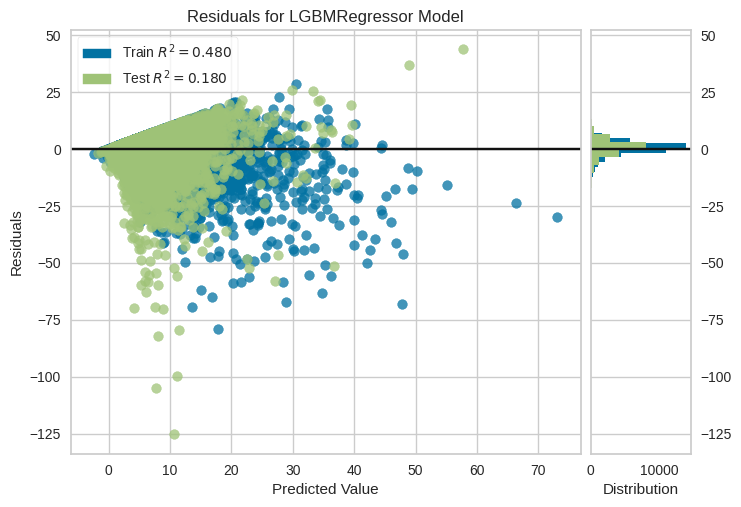

In [204]:
exp1.plot_model(tune_lightgbm)

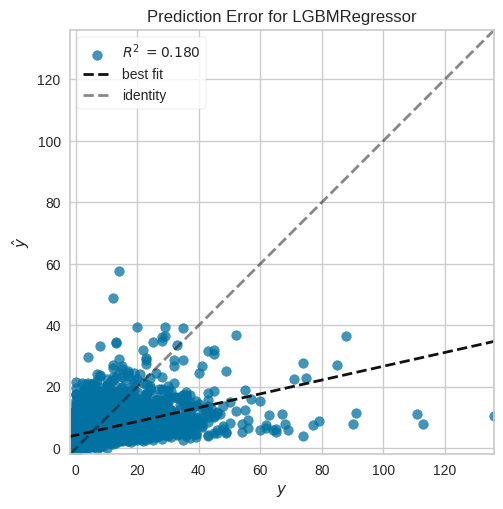

In [205]:
exp1.plot_model(tune_lightgbm, plot = 'error')

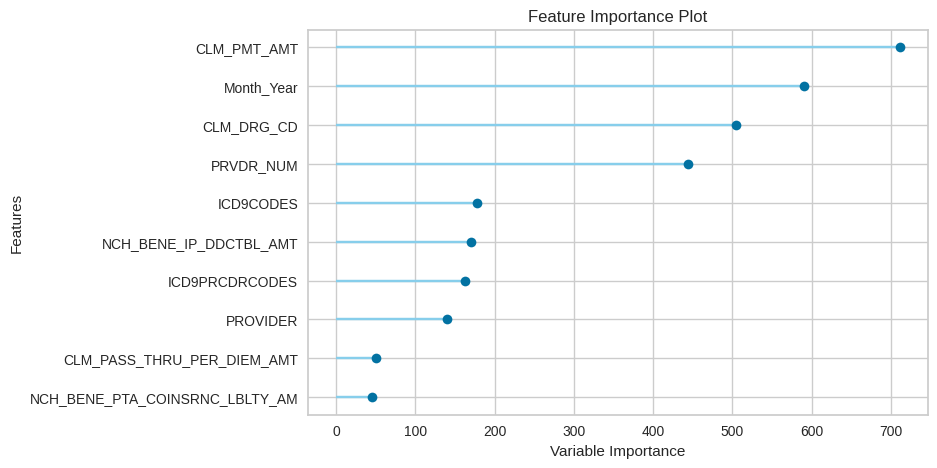

In [231]:
exp1.plot_model(tune_lightgbm, plot = 'feature')

**Observation**
* Claim Payment Amount, is the most important feature in determining the CLM_UTLZTN_DAY_CNT. Followed by month/year.
* This is important to note. It is obvious that CLM_PMT_AMT will be the highest importance due to the fact that number of days in the hopistal will be directly impact the payment. The more serious the sicknes more days the patient will stay in the hospital and will lead to higher cost to the payer.
* So now it is imperative to note the other features that impacts the days that a patient stays in the hospital. It would be benefical to understand how Month_Year, CLM_CRG_CD and PRVDR_NUM impacts the target value.

In [207]:
exp1.plot_model(tune_lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


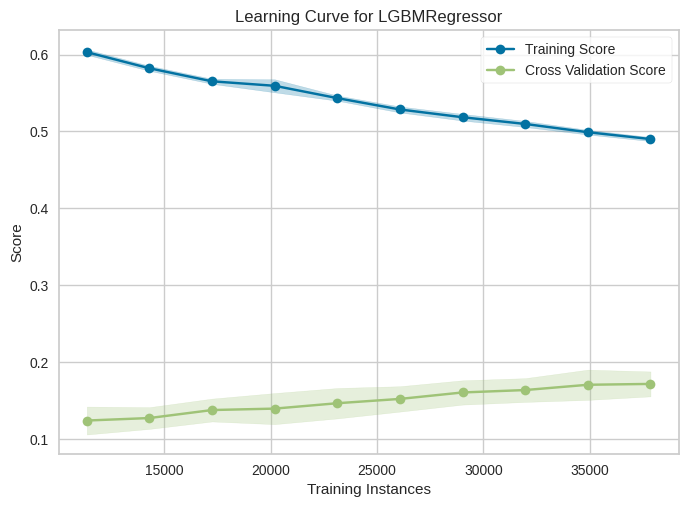

In [208]:
exp1.plot_model(tune_lightgbm, plot = 'learning')

**Observation** <br>
Looking at the learning curve for the LGBMRegressor, there's quite a gap between the training and cross-validation scores. This suggests that the model fits the training data well but struggles with generalizing to new, unseen data. This discrepancy is a classic sign of high variance in your dataset, meaning the model might be overfitting. Something to consider for improving its generalization.

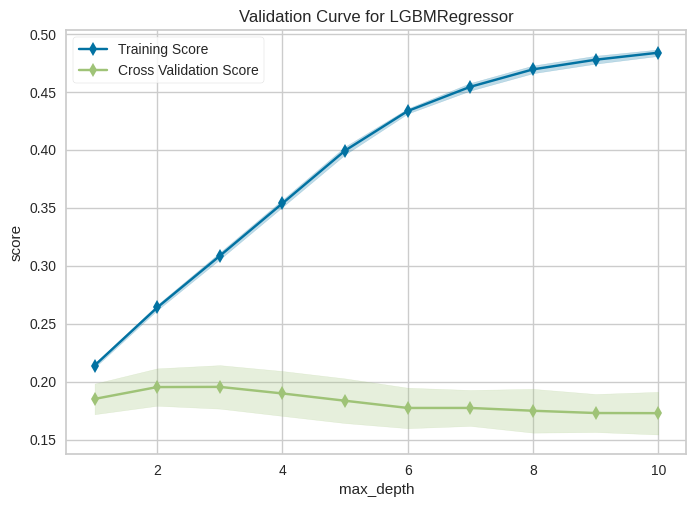

In [209]:
exp1.plot_model(tune_lightgbm, plot = 'vc')

**Observation**<br>
This graph is a validation curve for an LGBMRegressor, plotting the training score and cross-validation score against the max_depth parameter.

**Here’s what you’re learning about your dataset:**

Training Score: As max_depth increases, the training score improves, indicating the model fits the training data better with deeper trees.

Cross-Validation Score: Initially, this also improves with max_depth, but after a certain point, it plateaus and slightly decreases, suggesting deeper trees don’t always help and can lead to overfitting.

Overfitting: The widening gap between the training and cross-validation scores at higher max_depth levels suggests overfitting—your model is too tuned to the training data and struggles with new data.

So, while increasing max_depth might seem like a good idea at first, there's a point where it starts to harm your model’s ability to generalize. Aim for the sweet spot where the cross-validation score is highest to balance bias and variance!

## Evaluate model

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

*I don't recommend using this evaluate model functionality! very slow plus bugs! do separate plots instead.*

In [210]:
dummy = exp1.create_model('dummy', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8299,39.7155,6.3020,-0.0000,0.7688,1.1879
1,3.8670,41.4303,6.4366,-0.0002,0.7620,1.1649
2,3.8645,40.7889,6.3866,-0.0001,0.7740,1.1911
3,3.8145,38.8269,6.2311,-0.0001,0.7540,1.1594
4,3.8535,39.1897,6.2602,-0.0001,0.7728,1.1866
Mean,3.8459,39.9903,6.3233,-0.0001,0.7663,1.1780
Std,0.0205,0.9779,0.0772,0.0001,0.0074,0.0131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [211]:
exp1.evaluate_model(dummy)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Ensemble a Model
Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting

In [212]:
# lets create a simple decision tree model that we will use for ensembling
dt = exp1.create_model('dummy')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7772,38.4786,6.2031,-0.0001,0.7635,1.1775
1,3.8807,40.9526,6.3994,-0.0000,0.7737,1.1966
2,3.9108,41.9458,6.4766,-0.0003,0.7678,1.1814
3,3.8304,40.9107,6.3962,-0.0001,0.7573,1.1542
4,3.8752,42.1668,6.4936,-0.0000,0.7702,1.1827
5,3.8497,39.4012,6.2770,-0.0001,0.7771,1.1965
6,3.7864,39.7159,6.3021,-0.0000,0.7575,1.1649
7,3.8458,37.9368,6.1593,-0.0002,0.7510,1.1566
8,3.8519,38.9176,6.2384,-0.0000,0.7672,1.1643


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [213]:
bagged_dt = exp1.ensemble_model(dummy)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7793,38.4793,6.2032,-0.0001,0.7639,1.1792
1,3.8852,40.9526,6.3994,-0.0000,0.7744,1.2003
2,3.9145,41.9435,6.4764,-0.0002,0.7684,1.1845
3,3.8338,40.9094,6.3960,-0.0001,0.7578,1.1569
4,3.8788,42.1672,6.4936,-0.0000,0.7707,1.1854
5,3.8506,39.4015,6.2771,-0.0001,0.7772,1.1972
6,3.7859,39.7159,6.3021,-0.0000,0.7575,1.1646
7,3.8448,37.9373,6.1593,-0.0002,0.7508,1.1558
8,3.8517,38.9176,6.2384,-0.0000,0.7672,1.1643


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [214]:
boosted_dt = exp1.ensemble_model(dummy, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4777,41.0686,6.4085,-0.0674,0.8643,1.6237
1,4.6027,43.4799,6.5939,-0.0617,0.8764,1.6608
2,4.6259,44.2791,6.6543,-0.0559,0.8702,1.6489
3,4.5025,43.1360,6.5678,-0.0545,0.8550,1.5916
4,4.7170,45.3590,6.7349,-0.0757,0.8859,1.6996
5,4.5520,41.9540,6.4772,-0.0649,0.8770,1.6430
6,4.5172,42.3116,6.5047,-0.0654,0.8607,1.6250
7,4.6061,40.5222,6.3657,-0.0683,0.8571,1.6371
8,4.6317,41.7013,6.4577,-0.0715,0.8740,1.6399


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Blending and Stacking

* **Blend** trains a Voting Regressor for select models passed in the estimator_list param. It creates multiple models and then averages the individual predictions to form a final prediction.


* **Stack** trains a meta model over select estimators passed in the estimator_list parameter. Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of stack_models() is based on Wolpert, D. H. (1992b). Stacked generalization

In [215]:
top3_exp1

[LGBMRegressor(n_jobs=-1, random_state=555), DummyRegressor()]

In [216]:
blender = exp1.blend_models(estimator_list = top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3764,33.0315,5.7473,0.1415,0.6996,1.0175
1,3.4492,34.1926,5.8474,0.1651,0.7068,1.0379
2,3.5086,35.8475,5.9873,0.1452,0.7039,1.0254
3,3.4120,35.0590,5.9211,0.1429,0.6940,0.9893
4,3.4639,35.7076,5.9756,0.1532,0.7073,1.0289
5,3.4184,33.2358,5.7650,0.1564,0.7090,1.0256
6,3.3726,33.5770,5.7946,0.1546,0.6946,1.0177
7,3.4071,31.4389,5.6070,0.1711,0.6857,1.0037
8,3.4178,32.7933,5.7265,0.1574,0.7001,1.0018


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [217]:
blender

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=555)),
                            ('Dummy Regressor', DummyRegressor())],
                n_jobs=-1)

Now that we have created a VotingRegressor using the blend_models() function. The model returned by the blend_models function is just like any other model that you would create using create_model() or tune_model(). You can use this model for predictions on unseen data using predict_model() in the same way you would for any other model.

In [218]:
stacker = exp1.stack_models(estimator_list=top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3183,32.3074,5.6840,0.1603,0.6836,0.9560
1,3.3618,33.1045,5.7537,0.1916,0.6908,0.9760
2,3.4440,34.8168,5.9006,0.1697,0.6892,0.9643
3,3.3278,33.9236,5.8244,0.1707,0.6781,0.9233
4,3.3889,34.5108,5.8746,0.1816,0.6915,0.9687
5,3.3158,31.8468,5.6433,0.1916,0.6900,0.9576
6,3.2985,32.3167,5.6848,0.1863,0.6793,0.9634
7,3.3241,30.2887,5.5035,0.2015,0.6718,0.9463
8,3.3314,31.8466,5.6433,0.1817,0.6833,0.9386


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [219]:
stacker

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555)),
                              ('Dummy Regressor', DummyRegressor())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

By default, the meta model (final model to generate predictions) is Linear Regression. The meta model can be changed using the meta_model parameter. See an example below:

In [220]:
lightgbm = exp1.create_model('lightgbm')
stacker_lightgbm = exp1.stack_models(top3_exp1, meta_model = lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3515,32.8860,5.7346,0.1453,0.6843,0.9284
1,3.3803,33.6155,5.7979,0.1792,0.6915,0.9478
2,3.4683,35.2296,5.9354,0.1599,0.6895,0.9364
3,3.3471,34.1402,5.8430,0.1654,0.6787,0.8937
4,3.4158,34.8257,5.9013,0.1741,0.6917,0.9426
5,3.3132,31.7783,5.6372,0.1934,0.6868,0.9196
6,3.3311,32.4350,5.6952,0.1833,0.6812,0.9436
7,3.3463,30.6357,5.5349,0.1923,0.6751,0.9198
8,3.3438,32.3543,5.6881,0.1686,0.6828,0.9054


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3202,32.3147,5.6846,0.1601,0.6816,0.9461
1,3.3766,33.6358,5.7996,0.1787,0.6920,0.9658
2,3.4554,34.5169,5.8751,0.1769,0.6887,0.9642
3,3.3378,34.1688,5.8454,0.1647,0.6797,0.9238
4,3.4113,35.0389,5.9194,0.1690,0.6932,0.9732
5,3.3224,32.0604,5.6622,0.1862,0.6898,0.9491
6,3.3283,32.7363,5.7216,0.1757,0.6829,0.9684
7,3.3476,30.6954,5.5403,0.1907,0.6737,0.9489
8,3.3459,31.9470,5.6522,0.1791,0.6862,0.9443


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [221]:
stacker_lightgbm

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555)),
                              ('Dummy Regressor', DummyRegressor())],
                  final_estimator=LGBMRegressor(n_jobs=-1, random_state=555),
                  n_jobs=-1)

## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

note: so far, our best model is the ElasticNet Model

In [222]:
holdout_pred = exp1.predict_model(tune_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.3207,31.8291,5.6417,0.1803,0.6767,0.9178


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [223]:
final_en_model = exp1.finalize_model(tune_lightgbm)

In [224]:
final_en_model

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=555))])

### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning and contains 10% of the original dataset which was never exposed to PyCaret.

In [225]:
unseen_predictions = exp1.predict_model(final_en_model, data=data_unseen)
unseen_predictions.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.3755,30.7454,5.5448,0.1925,0.6891,0.9211


,SEGMENT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_DRG_CD,Month_Year,ICD9CODES,ICD9PRCDRCODES,PROVIDER,CLM_UTLZTN_DAY_CNT,prediction_label
6667,1,0601TR,5000.0,0.0,100.0,1024.0,0.0,0.0,228,2008-01,78650++42731,2101.0++78791,5442200617.0++5805252285.0++nan,0,4.335679
6668,1,0600RM,3000.0,0.0,0.0,1024.0,0.0,0.0,658,2008-03,78079++59080,nan++nan,5351952633.0++nan++nan,5,3.003063
6669,1,4502NS,3000.0,0.0,100.0,1100.0,0.0,0.0,658,2010-03,5990++5990,nan++nan,2048463822.0++nan++nan,1,3.330314
6670,1,0300TN,30000.0,0.0,0.0,1068.0,0.0,0.0,372,2009-01,78909++1531,4576.0++5849,5182310219.0++3831120968.0++nan,14,11.850142
6671,1,3301QJ,4000.0,0.0,0.0,1068.0,0.0,0.0,093,2009-10,4359++4359,8914.0++nan,614394085.0++614394085.0++nan,1,2.450904
6672,1,0300CC,11000.0,0.0,0.0,1100.0,0.0,0.0,457,2010-10,71516++71535,8154.0++4280,1521516773.0++3563005767.0++nan,5,5.811105
6673,1,0505KQ,9000.0,0.0,0.0,1100.0,0.0,0.0,387,2010-09,5609++5609,nan++nan,8155444621.0++nan++nan,1,7.562423
6674,1,0501MA,4000.0,0.0,0.0,1024.0,0.0,0.0,282,2008-10,4019++4019,nan++nan,8198589276.0++nan++nan,1,1.932981
6675,1,39T0CG,16000.0,0.0,300.0,1100.0,0.0,0.0,308,2010-01,4414++41072,3971.0++4019,337309325.0++337309325.0++4240686681.0,1,6.176615
6676,1,33026U,4000.0,0.0,0.0,1068.0,0.0,0.0,228,2009-11,79902++42823,8605.0++nan,2584638480.0++4410779254.0++nan,3,4.489269


## Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [226]:
exp1.save_model(final_en_model, 'my_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=555))]),
 'my_pycaret_regression.pkl')

##Load Model

In [227]:
my_winning_regressor = load_model('my_pycaret_regression')

Transformation Pipeline and Model Successfully Loaded


In [228]:
my_winning_regressor

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=555))])